In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from functools import reduce

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
pd.options.mode.chained_assignment = None

In [5]:
from scipy.stats import pointbiserialr

**IMPORT SURVEY DATABASE

In [6]:
file_path = r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\data\SurveyData.csv"

In [7]:
survey = pd.read_csv(file_path, header=None)

C:\Users\AaronH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,2,3,4,5,6,7,8,10,11,12,14,15,16,17,18,19,20,21,30,31,34,35,44,49,53,54,55,56,57,58,59,71,72,73,74,75,76,91,92,93,94,95,96,97,98,99,101,115) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
survey_table = survey

In [9]:
survey_table

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
1,1.12971E+11,XX,4,4,4,4,2,4,4,4,...,B,B,B,B,B,B,A,A,A,2.238814299
2,1.94869E+11,XX,4,3,5,4,4,4,5,4,...,B,B,B,B,A,A,A,A,A,2.238814299
3,1.52966E+11,XX,5,5,5,5,2,5,5,2,...,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,1.502352285
4,1.93041E+11,XX,2,2,4,1,3,2,2,1,...,B,B,B,B,A,A,B,A,A,1.756431349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557774,1.9578e+11,ST,4,4,5,4,3,4,4,3,...,B,B,B,B,B,C,A,B,B,2.48538
557775,1.02163e+11,ST,4,4,4,4,2,3,3,4,...,B,B,B,B,B,C,A,B,D,1.67791
557776,1.64068e+11,ST,5,5,4,4,3,5,5,5,...,B,B,B,B,B,C,A,B,B,3.58316
557777,1.55255e+11,ST,5,5,5,5,4,5,5,5,...,B,B,B,B,B,C,B,B,A,2.73418


**FORMAT ORIGINAL DATABASE

In [10]:
survey_table.columns = survey_table.iloc[0]

In [11]:
survey_table = survey_table[1:]

In [12]:
survey_table

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
1,1.12971E+11,XX,4,4,4,4,2,4,4,4,...,B,B,B,B,B,B,A,A,A,2.238814299
2,1.94869E+11,XX,4,3,5,4,4,4,5,4,...,B,B,B,B,A,A,A,A,A,2.238814299
3,1.52966E+11,XX,5,5,5,5,2,5,5,2,...,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,1.502352285
4,1.93041E+11,XX,2,2,4,1,3,2,2,1,...,B,B,B,B,A,A,B,A,A,1.756431349
5,1.46656E+11,XX,4,4,4,4,4,2,4,2,...,B,B,B,A,B,A,B,B,A,1.756431349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557774,1.9578e+11,ST,4,4,5,4,3,4,4,3,...,B,B,B,B,B,C,A,B,B,2.48538
557775,1.02163e+11,ST,4,4,4,4,2,3,3,4,...,B,B,B,B,B,C,A,B,D,1.67791
557776,1.64068e+11,ST,5,5,4,4,3,5,5,5,...,B,B,B,B,B,C,A,B,B,3.58316
557777,1.55255e+11,ST,5,5,5,5,4,5,5,5,...,B,B,B,B,B,C,B,B,A,2.73418


**REMAP AGENCY NAME

In [13]:
agency_map = {'AF': 'United States Department of the Air Force', 'AG': 'Department of Agriculture', 'AM':'U.S. Agency for International Development', 
             'AR':'United States Department of the Army','CM':'Department of Commerce','CU':'National Credit Union Administration','DD':'OSD, Joint Staff, Defense Agencies, and Field Activities',
             'DJ':'Department of Justice','DL':'Department of Labor','DN':'Department of Energy','DR':'Federal Energy Regulatory Commission',
             'ED':'Department of Education','EE':'Equal Employment Opportunity Commission','EP':'Environmental Protection Agency','FT':'Federal Trade Commission',
             'GS':'General Services Administration','HE':'Department of Health and Human Services','HS':'Department of Homeland Security',
             'HU':'Department of Housing and Urban Development','IN':'Department of the Interior','NF':'National Science Foundation','NQ':'National Archives and Records Administration',
             'NU':'Nuclear Regulatory Commission','NV':'United States Department of the Navy','OM':'Office of Personnel Management','SB':'Small Business Administration',
             'ST':'Department of State','SZ':'Social Security Administration','TD':'Department of Transportation','TR':'Department of the Treasury','XX':'All Other Agencies'}

In [14]:
survey_table['AGENCY'] = survey_table['agency'].map(agency_map)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
groupby_survey_table = survey_table.groupby('AGENCY').size().reset_index()

In [16]:
groupby_survey_table

,AGENCY,0
0,All Other Agencies,9703
1,Department of Agriculture,43332
2,Department of Commerce,21009
3,Department of Education,2698
4,Department of Energy,8587
5,Department of Health and Human Services,50317
6,Department of Homeland Security,73070
7,Department of Housing and Urban Development,4866
8,Department of Justice,25866
9,Department of Labor,7550


**CREATE INDEX SCORE COLUMN LISTS

**My Work Experience Index

In [18]:
my_work_experience =['Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13']

In [19]:
survey_table[my_work_experience] = survey_table[my_work_experience].replace('X', pd.NA)

In [20]:
survey_table[my_work_experience] = survey_table[my_work_experience].apply(pd.to_numeric, errors='coerce')

In [21]:
survey_table['my_work_experience_index'] = survey_table[my_work_experience].mean(axis=1)

In [22]:
survey_table

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT,AGENCY,my_work_experience_index
1,1.12971E+11,XX,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,...,B,B,B,B,A,A,A,2.238814299,All Other Agencies,3.846154
2,1.94869E+11,XX,4.0,3.0,5.0,4.0,4.0,4.0,5.0,4.0,...,B,B,A,A,A,A,A,2.238814299,All Other Agencies,3.923077
3,1.52966E+11,XX,5.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,...,B,NaN,NaN,NaN,NaN,NaN,NaN,1.502352285,All Other Agencies,4.076923
4,1.93041E+11,XX,2.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,...,B,B,A,A,B,A,A,1.756431349,All Other Agencies,2.615385
5,1.46656E+11,XX,4.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,...,B,A,B,A,B,B,A,1.756431349,All Other Agencies,3.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557774,1.9578e+11,ST,4.0,4.0,5.0,4.0,3.0,4.0,4.0,3.0,...,B,B,B,C,A,B,B,2.48538,Department of State,3.461538
557775,1.02163e+11,ST,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,...,B,B,B,C,A,B,D,1.67791,Department of State,3.384615
557776,1.64068e+11,ST,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,...,B,B,B,C,A,B,B,3.58316,Department of State,4.230769
557777,1.55255e+11,ST,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,B,B,B,C,B,B,A,2.73418,Department of State,4.461538


In [31]:
my_work_experience_index_groupby = survey_table.groupby('AGENCY')['my_work_experience_index'].mean().reset_index()
my_work_experience_index_groupby

,AGENCY,my_work_experience_index
0,All Other Agencies,3.850450
1,Department of Agriculture,3.681917
2,Department of Commerce,3.839047
3,Department of Education,3.820196
4,Department of Energy,3.909516
5,Department of Health and Human Services,3.932961
6,Department of Homeland Security,3.641606
7,Department of Housing and Urban Development,3.861385
8,Department of Justice,3.683098
9,Department of Labor,3.809498


**My Work Experience Index Buckets

In [24]:
def work_experience_bucket(series):
    if series < 2.5:
        return 'Weak'
    elif 2.5 <= series < 3.5:
        return 'Moderate'
    elif series >= 3.5:
        return 'Strong'

survey_table['my_work_experience_tier'] = survey_table['my_work_experience_index'].apply(work_experience_bucket)

survey_table['my_work_experience_tier'].value_counts(sort=False)

Strong      389016
Weak         36182
Moderate    132551
Name: my_work_experience_tier, dtype: int64

In [25]:
my_work_experience_tier_groupby = survey_table.groupby('AGENCY')['my_work_experience_index'].mean().reset_index()
my_work_experience_tier_groupby

,AGENCY,my_work_experience_index
0,All Other Agencies,3.850450
1,Department of Agriculture,3.681917
2,Department of Commerce,3.839047
3,Department of Education,3.820196
4,Department of Energy,3.909516
5,Department of Health and Human Services,3.932961
6,Department of Homeland Security,3.641606
7,Department of Housing and Urban Development,3.861385
8,Department of Justice,3.683098
9,Department of Labor,3.809498


**My Work Unit

In [25]:
my_work_unit =['Q14', 'Q16', 'Q17', 'Q18','Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34']

In [26]:
survey_table[my_work_unit] = survey_table[my_work_unit].replace('X', pd.NA)

In [27]:
survey_table[my_work_unit] = survey_table[my_work_unit].apply(pd.to_numeric, errors='coerce')

In [28]:
survey_table['my_work_unit_index'] = survey_table[my_work_unit].mean(axis=1)

In [29]:
my_work_unit_index_groupby = survey_table.groupby('AGENCY')['my_work_unit_index'].mean().reset_index()
my_work_unit_index_groupby

,AGENCY,my_work_unit_index
0,All Other Agencies,3.978457
1,Department of Agriculture,3.778819
2,Department of Commerce,3.864093
3,Department of Education,3.979420
4,Department of Energy,4.014278
5,Department of Health and Human Services,4.001743
6,Department of Homeland Security,3.683334
7,Department of Housing and Urban Development,3.979773
8,Department of Justice,3.724516
9,Department of Labor,3.926270


**My Work Unit Index - Buckets 

In [30]:
def work_unit_bucket(series):
    if series < 2.5:
        return 'Weak'
    elif 2.5 <= series < 3.5:
        return 'Moderate'
    elif series >= 3.5:
        return 'Strong'

survey_table['my_work_unit_tier'] = survey_table['my_work_unit_index'].apply(work_unit_bucket)

survey_table['my_work_unit_tier'].value_counts(sort=False)

Strong      407537
Weak         27003
Moderate    123197
Name: my_work_unit_tier, dtype: int64

In [32]:
my_work_unit_tier_groupby = survey_table.groupby('AGENCY')['my_work_unit_index'].mean().reset_index()
my_work_unit_tier_groupby

,AGENCY,my_work_unit_index
0,All Other Agencies,3.978457
1,Department of Agriculture,3.778819
2,Department of Commerce,3.864093
3,Department of Education,3.979420
4,Department of Energy,4.014278
5,Department of Health and Human Services,4.001743
6,Department of Homeland Security,3.683334
7,Department of Housing and Urban Development,3.979773
8,Department of Justice,3.724516
9,Department of Labor,3.926270


**My Organization Index

In [32]:
my_organization = ['Q35', 'Q36', 'Q37', 'Q38','Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44']

In [33]:
survey_table[my_organization] = survey_table[my_organization].replace('X', pd.NA)

In [34]:
survey_table[my_organization] = survey_table[my_organization].apply(pd.to_numeric, errors='coerce')

In [35]:
survey_table['my_organization_index'] = survey_table[my_organization].mean(axis=1)

In [36]:
my_organization_index_groupby = survey_table.groupby('AGENCY')['my_organization_index'].mean().reset_index()
my_organization_index_groupby

,AGENCY,my_organization_index
0,All Other Agencies,3.788522
1,Department of Agriculture,3.632230
2,Department of Commerce,3.837819
3,Department of Education,3.810235
4,Department of Energy,3.928674
5,Department of Health and Human Services,3.957244
6,Department of Homeland Security,3.548823
7,Department of Housing and Urban Development,3.756386
8,Department of Justice,3.567589
9,Department of Labor,3.894003


**My Organization Tier

In [37]:
def organization_bucket(series):
    if series < 2.5:
        return 'Weak'
    elif 2.5 <= series < 3.5:
        return 'Moderate'
    elif series >= 3.5:
        return 'Strong'

survey_table['my_organization_tier'] = survey_table['my_organization_index'].apply(organization_bucket)

survey_table['my_organization_tier'].value_counts(sort=False)

Strong      379251
Weak         39916
Moderate    130301
Name: my_organization_tier, dtype: int64

In [52]:
my_organization_tier_groupby = survey_table.groupby('AGENCY')['my_organization_tier'].mean().reset_index()
my_organization_tier_groupby

DataError: No numeric types to aggregate

**My Supervisor Index

In [38]:
my_supervisor = ['Q45', 'Q46', 'Q47', 'Q48','Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54']

In [39]:
survey_table[my_supervisor] = survey_table[my_supervisor].replace('X', pd.NA)

In [40]:
survey_table[my_supervisor] = survey_table[my_supervisor].apply(pd.to_numeric, errors='coerce')

In [41]:
survey_table['my_supervisor_index'] = survey_table[my_supervisor].mean(axis=1)

In [42]:
my_supervisor_index_groupby = survey_table.groupby('AGENCY')['my_supervisor_index'].mean().reset_index()
my_supervisor_index_groupby

,AGENCY,my_supervisor_index
0,All Other Agencies,4.254086
1,Department of Agriculture,4.157109
2,Department of Commerce,4.284745
3,Department of Education,4.345552
4,Department of Energy,4.332880
5,Department of Health and Human Services,4.301426
6,Department of Homeland Security,4.057310
7,Department of Housing and Urban Development,4.307146
8,Department of Justice,4.043215
9,Department of Labor,4.278426


**My Supervisor Tier

In [43]:
def supervisor_bucket(series):
    if series < 2.5:
        return 'Weak'
    elif 2.5 <= series < 3.5:
        return 'Moderate'
    elif series >= 3.5:
        return 'Strong'
    
survey_table['my_supervisor_tier'] = survey_table['my_supervisor_index'].apply(supervisor_bucket)

survey_table['my_supervisor_tier'].value_counts(sort=False)

Strong      449545
Weak         30204
Moderate     65858
Name: my_supervisor_tier, dtype: int64

In [202]:
my_supervisor_tier_groupby = survey_table.groupby('AGENCY')['my_supervisor_tier'].mean().reset_index()
my_supervisor_tier_groupby

,AGENCY,my_supervisor_tier
0,All Other Agencies,2.802135
1,Department of Agriculture,2.782051
2,Department of Commerce,2.824719
3,Department of Education,2.844078
4,Department of Energy,2.847096
5,Department of Health and Human Services,2.828088
6,Department of Homeland Security,2.710309
7,Department of Housing and Urban Development,2.816399
8,Department of Justice,2.683015
9,Department of Labor,2.812584


**Leadership Index

In [44]:
leadership = ['Q55', 'Q56', 'Q57', 'Q58','Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64']

In [45]:
survey_table[leadership] = survey_table[leadership].replace('X', pd.NA)

In [46]:
survey_table[leadership] = survey_table[leadership].apply(pd.to_numeric, errors='coerce')

In [47]:
survey_table['leadership_index'] = survey_table[leadership].mean(axis=1)

In [48]:
leadership_index_groupby = survey_table.groupby('AGENCY')['leadership_index'].mean().reset_index()
leadership_index_groupby

,AGENCY,leadership_index
0,All Other Agencies,3.580170
1,Department of Agriculture,3.402016
2,Department of Commerce,3.568648
3,Department of Education,3.632828
4,Department of Energy,3.683964
5,Department of Health and Human Services,3.782065
6,Department of Homeland Security,3.300381
7,Department of Housing and Urban Development,3.670732
8,Department of Justice,3.305478
9,Department of Labor,3.666771


**Leadership Tier

In [49]:
def leadership_bucket(series):
    if series < 2.5:
        return 'Weak'
    elif 2.5 <= series < 3.5:
        return 'Moderate'
    elif series >= 3.5:
        return 'Strong'

survey_table['leadership_tier'] = survey_table['leadership_index'].apply(leadership_bucket)

survey_table['leadership_tier'].value_counts(sort=False)

Strong      312049
Weak         88394
Moderate    140642
Name: leadership_tier, dtype: int64

In [209]:
leadership_tier_groupby = survey_table.groupby('AGENCY')['leadership_tier'].mean().reset_index()
leadership_tier_groupby

,AGENCY,leadership_tier
0,All Other Agencies,2.455034
1,Department of Agriculture,2.346974
2,Department of Commerce,2.456291
3,Department of Education,2.491902
4,Department of Energy,2.523224
5,Department of Health and Human Services,2.592317
6,Department of Homeland Security,2.260843
7,Department of Housing and Urban Development,2.511442
8,Department of Justice,2.255408
9,Department of Labor,2.504667


**My Satisfaction Index

In [50]:
my_satisfaction = ['Q65', 'Q66', 'Q67', 'Q68','Q69', 'Q70']

In [51]:
survey_table[my_satisfaction] = survey_table[my_satisfaction].replace('X', pd.NA)

In [52]:
survey_table[my_satisfaction] = survey_table[my_satisfaction].apply(pd.to_numeric, errors='coerce')

In [53]:
survey_table['my_satisfaction_index'] = survey_table[my_satisfaction].mean(axis=1)

In [54]:
my_satisfaction_index_groupby = survey_table.groupby('AGENCY')['my_satisfaction_index'].mean().reset_index()
my_satisfaction_index_groupby

,AGENCY,my_satisfaction_index
0,All Other Agencies,3.607296
1,Department of Agriculture,3.381343
2,Department of Commerce,3.556084
3,Department of Education,3.626382
4,Department of Energy,3.731459
5,Department of Health and Human Services,3.737435
6,Department of Homeland Security,3.319281
7,Department of Housing and Urban Development,3.694386
8,Department of Justice,3.377020
9,Department of Labor,3.624555


**My Satisfaction Tier

In [55]:
def satisfaction_bucket(series):
    if series < 2.5:
        return 'Weak'
    elif 2.5 <= series < 3.5:
        return 'Moderate'
    elif series >= 3.5:
        return 'Strong'
    
survey_table['my_satisfaction_tier'] = survey_table['my_satisfaction_index'].apply(satisfaction_bucket)

survey_table['my_satisfaction_tier'].value_counts(sort=False)

Strong      314801
Weak         75803
Moderate    145337
Name: my_satisfaction_tier, dtype: int64

In [216]:
my_satisfaction_tier_groupby = survey_table.groupby('AGENCY')['my_satisfaction_tier'].mean().reset_index()
my_satisfaction_tier_groupby

,AGENCY,my_satisfaction_tier
0,All Other Agencies,2.501593
1,Department of Agriculture,2.363427
2,Department of Commerce,2.491541
3,Department of Education,2.531309
4,Department of Energy,2.597287
5,Department of Health and Human Services,2.600877
6,Department of Homeland Security,2.298761
7,Department of Housing and Urban Development,2.564877
8,Department of Justice,2.335597
9,Department of Labor,2.511897


**DEI Index

In [56]:
dei =['Q71', 'Q72', 'Q73', 'Q74','Q75', 'Q76', 'Q77', 'Q78', 'Q79', 'Q80', 'Q81', 'Q82', 'Q83', 'Q84']

In [57]:
survey_table[dei] = survey_table[dei].replace('X', pd.NA)

In [58]:
survey_table[dei] = survey_table[dei].apply(pd.to_numeric, errors='coerce')

In [59]:
survey_table['dei_index'] = survey_table[dei].mean(axis=1)

In [60]:
dei_index_groupby = survey_table.groupby('AGENCY')['dei_index'].mean().reset_index()
dei_index_groupby

,AGENCY,dei_index
0,All Other Agencies,3.997454
1,Department of Agriculture,3.859978
2,Department of Commerce,3.984408
3,Department of Education,4.012500
4,Department of Energy,4.059161
5,Department of Health and Human Services,4.025969
6,Department of Homeland Security,3.736395
7,Department of Housing and Urban Development,3.990922
8,Department of Justice,3.765358
9,Department of Labor,3.985869


**DEI Tier

In [61]:
def dei_bucket(series):
    if series < 2.5:
        return 'Weak'
    elif 2.5 <= series < 3.5:
        return 'Moderate'
    elif series >= 3.5:
        return 'Strong'
    
survey_table['dei_tier'] = survey_table['dei_index'].apply(dei_bucket)

survey_table['dei_tier'].value_counts(sort=False)

Strong      398159
Weak         36508
Moderate    101900
Name: dei_tier, dtype: int64

In [223]:
dei_tier_groupby = survey_table.groupby('AGENCY')['dei_tier'].mean().reset_index()
dei_tier_groupby

,AGENCY,dei_tier
0,All Other Agencies,2.730553
1,Department of Agriculture,2.686382
2,Department of Commerce,2.743329
3,Department of Education,2.750756
4,Department of Energy,2.766611
5,Department of Health and Human Services,2.748036
6,Department of Homeland Security,2.575348
7,Department of Housing and Urban Development,2.722046
8,Department of Justice,2.583419
9,Department of Labor,2.719320


**Employee Experience Index

In [62]:
employee_experience = ['Q85', 'Q86', 'Q87', 'Q88','Q89']

In [63]:
survey_table[employee_experience] = survey_table[employee_experience].replace('X', pd.NA)

In [64]:
survey_table[employee_experience] = survey_table[employee_experience].apply(pd.to_numeric, errors='coerce')

In [65]:
survey_table['employee_experience_index'] = survey_table[employee_experience].mean(axis=1)

In [66]:
employee_experience_index_groupby = survey_table.groupby('AGENCY')['employee_experience_index'].mean().reset_index()
employee_experience_index_groupby

,AGENCY,employee_experience_index
0,All Other Agencies,4.017651
1,Department of Agriculture,3.868381
2,Department of Commerce,3.934885
3,Department of Education,4.001667
4,Department of Energy,3.995171
5,Department of Health and Human Services,4.122165
6,Department of Homeland Security,3.791333
7,Department of Housing and Urban Development,3.996003
8,Department of Justice,3.869712
9,Department of Labor,3.998836


**Employee Experience Tiers

In [67]:
#Create Employee Experience Tier Buckets and Groupby
def employee_experience_bucket(series):
    if series < 2.5:
        return 'Weak'
    elif 2.5 <= series < 3.5:
        return 'Moderate'
    elif series >= 3.5:
        return 'Strong'

survey_table['employee_experience_tier'] = survey_table['employee_experience_index'].apply(employee_experience_bucket)

survey_table['employee_experience_tier'].value_counts(sort=False)

Strong      390914
Weak         33503
Moderate    108964
Name: employee_experience_tier, dtype: int64

In [230]:
employee_experience_tier_groupby = survey_table.groupby('AGENCY')['employee_experience_tier'].mean().reset_index()
employee_experience_tier_groupby

,AGENCY,employee_experience_tier
0,All Other Agencies,2.725379
1,Department of Agriculture,2.659806
2,Department of Commerce,2.693781
3,Department of Education,2.730038
4,Department of Energy,2.714456
5,Department of Health and Human Services,2.792873
6,Department of Homeland Security,2.580252
7,Department of Housing and Urban Development,2.719302
8,Department of Justice,2.614494
9,Department of Labor,2.717938


**MAP INTENT TO LEAVE

In [232]:
leaving_map = {'A': '1', 'B': '0', 'C':'0', 'D':'0'}

survey_table['leaving'] = survey_table['DLEAVING'].map(leaving_map)

In [233]:
survey_table

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,my_supervisor_tier,leadership_index,leadership_tier,my_satisfaction_index,my_satisfaction_tier,dei_index,dei_tier,employee_experience_index,employee_experience_tier,leaving
1,1.12971E+11,XX,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,...,3.0,3.800000,3.0,4.000000,3.0,3.909091,3.0,4.0,3.0,1
2,1.94869E+11,XX,4.0,3.0,5.0,4.0,4.0,4.0,5.0,4.0,...,3.0,2.500000,2.0,3.833333,3.0,4.000000,3.0,4.8,3.0,1
3,1.52966E+11,XX,5.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,...,3.0,2.111111,1.0,4.000000,3.0,4.363636,3.0,5.0,3.0,NaN
4,1.93041E+11,XX,2.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,...,2.0,1.833333,1.0,1.000000,1.0,1.636364,1.0,3.6,3.0,1
5,1.46656E+11,XX,4.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,...,3.0,1.777778,1.0,2.833333,2.0,3.857143,3.0,4.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557774,1.9578e+11,ST,4.0,4.0,5.0,4.0,3.0,4.0,4.0,3.0,...,2.0,2.400000,1.0,3.833333,3.0,2.928571,2.0,4.5,3.0,0
557775,1.02163e+11,ST,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,3.600000,3.0,3.500000,3.0,4.545455,3.0,4.2,3.0,0
557776,1.64068e+11,ST,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,...,3.0,4.200000,3.0,4.166667,3.0,3.800000,3.0,4.4,3.0,0
557777,1.55255e+11,ST,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,3.0,3.800000,3.0,4.666667,3.0,3.909091,3.0,4.2,3.0,1


In [234]:
survey_table['leaving'] = survey_table['leaving'].apply(pd.to_numeric, errors='coerce')

**Export Database

In [245]:
survey_table

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,my_supervisor_tier,leadership_index,leadership_tier,my_satisfaction_index,my_satisfaction_tier,dei_index,dei_tier,employee_experience_index,employee_experience_tier,leaving
1,1.12971E+11,XX,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,...,Strong,3.800000,Strong,4.000000,Strong,3.909091,Strong,4.0,Strong,1.0
2,1.94869E+11,XX,4.0,3.0,5.0,4.0,4.0,4.0,5.0,4.0,...,Strong,2.500000,Moderate,3.833333,Strong,4.000000,Strong,4.8,Strong,1.0
3,1.52966E+11,XX,5.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,...,Strong,2.111111,Weak,4.000000,Strong,4.363636,Strong,5.0,Strong,NaN
4,1.93041E+11,XX,2.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,...,Moderate,1.833333,Weak,1.000000,Weak,1.636364,Weak,3.6,Strong,1.0
5,1.46656E+11,XX,4.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,...,Strong,1.777778,Weak,2.833333,Moderate,3.857143,Strong,4.0,Strong,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557774,1.9578e+11,ST,4.0,4.0,5.0,4.0,3.0,4.0,4.0,3.0,...,Moderate,2.400000,Weak,3.833333,Strong,2.928571,Moderate,4.5,Strong,0.0
557775,1.02163e+11,ST,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,...,Strong,3.600000,Strong,3.500000,Strong,4.545455,Strong,4.2,Strong,0.0
557776,1.64068e+11,ST,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,...,Strong,4.200000,Strong,4.166667,Strong,3.800000,Strong,4.4,Strong,0.0
557777,1.55255e+11,ST,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,Strong,3.800000,Strong,4.666667,Strong,3.909091,Strong,4.2,Strong,1.0


In [244]:
survey_table.to_csv(r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\data\surveytable.csv")

**Correlation Leaving and Indices

In [148]:
survey_table_corr_employee_experience = survey_table.dropna(subset=['leaving'])
survey_table_corr_update_employee_experience = survey_table_corr.dropna(subset=['employee_experience_index'])

In [149]:
# Extract columns from DataFrame
dichotomous_variable = survey_table_corr_update_employee_experience['leaving']
continuous_variable = survey_table_corr_update_employee_experience['employee_experience_index']

# Calculate point biserial correlation coefficient
point_biserial_corr, p_value = pointbiserialr(dichotomous_variable, continuous_variable)

# Display the result
print("Point Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point Biserial Correlation Coefficient: 0.3650143248556651
P-value: 0.0


In [150]:
survey_table_corr_dei = survey_table.dropna(subset=['leaving'])
survey_table_corr_update_dei = survey_table_corr.dropna(subset=['dei_index'])

In [151]:
# Extract columns from DataFrame
dichotomous_variable = survey_table_corr_update_dei['leaving']
continuous_variable = survey_table_corr_update_dei['dei_index']

# Calculate point biserial correlation coefficient
point_biserial_corr, p_value = pointbiserialr(dichotomous_variable, continuous_variable)

# Display the result
print("Point Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point Biserial Correlation Coefficient: 0.3506464592686226
P-value: 0.0


In [152]:
survey_table_corr_my_supervisor = survey_table.dropna(subset=['leaving'])
survey_table_corr_update_my_supervisor = survey_table_corr.dropna(subset=['my_supervisor_index'])

In [154]:
# Extract columns from DataFrame
dichotomous_variable = survey_table_corr_update_my_supervisor['leaving']
continuous_variable = survey_table_corr_update_my_supervisor['my_supervisor_index']

# Calculate point biserial correlation coefficient
point_biserial_corr, p_value = pointbiserialr(dichotomous_variable, continuous_variable)

# Display the result
print("Point Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point Biserial Correlation Coefficient: 0.30882061031054125
P-value: 0.0


**Median Percentages Across Agencies

In [250]:
percentages = pd.crosstab(
    index=survey_table['AGENCY'],
    columns=[
        survey_table['my_work_experience_tier'],
        survey_table['my_work_unit_tier'],
        survey_table['my_organization_tier'],
        survey_table['my_supervisor_tier'],
        survey_table['leadership_tier'],
        survey_table['my_satisfaction_tier'],
        survey_table['dei_tier'],
        survey_table['employee_experience_tier']
    ],
    normalize='index'
) * 100

In [251]:
percentages

my_work_experience_tier                             Moderate            \
my_work_unit_tier                                   Moderate             
my_organization_tier                                Moderate             
my_supervisor_tier                                  Moderate             
leadership_tier                                     Moderate             
my_satisfaction_tier                                Moderate             
dei_tier                                            Moderate             
employee_experience_tier                            Moderate    Strong   
AGENCY                                                                   
All Other Agencies                                  0.397678  0.290198   
Department of Agriculture                           0.721311  0.420158   
Department of Commerce                              0.513127  0.219200   
Department of Education                             0.498466  0.230061   
Department of Energy                                0.563549  0.167866   
Department of Health and Human Services             0.489772  0.267523   
Department of Homeland Security                     0.829336  0.356875   
Department of Housing and Urban Development         0.385027  0.256684   
Department of Justice                               0.753674  0.347528   
Department of Labor                                 0.632302  0.247423   
Department of State                                 0.649526  0.433018   
Department of Transportation                        0.554945  0.240825   
Department of the Interior                          0.636868  0.504835   
Department of the Treasury                          0.640683  0.216527   
Environmental Protection Agency                     0.417227  0.309556   
Equal Employment Opportunity Commission             0.963391  0.192678   
Federal Energy Regulatory Commission                0.570342  0.190114   
Federal Trade Commission                            0.132626  0.000000   
General Services Administration                     0.609081  0.124585   
National Archives and Records Administration        0.808229  0.073475   
National Credit Union Administration                0.227531  0.113766   
National Science Foundation                         0.294118  0.196078   
Nuclear Regulatory Commission                       0.272628  0.163577   
OSD, Joint Staff, Defense Agencies, and Field A...  0.573708  0.234099   
Office of Personnel Management                      0.686813  0.068681   
Small Business Administration                       0.718778  0.449236   
Social Security Administration                      0.859438  0.502008   
U.S. Agency for International Development           0.298686  0.418160   
United States Department of the Air Force           0.690532  0.312629   
United States Department of the Army                0.799930  0.337826   
United States Department of the Navy                0.765771  0.321302   

my_work_experience_tier                                                 \
my_work_unit_tier                                                        
my_organization_tier                                                     
my_supervisor_tier                                                       
leadership_tier                                                          
my_satisfaction_tier                                                     
dei_tier                                                        Strong   
employee_experience_tier                                Weak  Moderate   
AGENCY                                                                   
All Other Agencies                                  0.042992  0.085985   
Department of Agriculture                           0.068002  0.109290   
Department of Commerce                              0.019927  0.029891   
Department of Education                             0.038344  0.076687   
Department of Energy                                0.047962  0.059952   
Dep

**MERGE ALL INDEX TABLES

In [167]:
index_tables = [my_work_experience_index_groupby, my_work_unit_index_groupby, my_organization_index_groupby, my_supervisor_index_groupby, leadership_index_groupby, my_satisfaction_index_groupby, dei_index_groupby, employee_experience_index_groupby]

In [70]:
merged_indices = reduce(lambda left, right: pd.merge(left, right, on='AGENCY', how='inner'), index_tables)

In [73]:
merged_indices

,AGENCY,my_work_experience_index,my_work_unit_index,my_organization_index,my_supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index
0,All Other Agencies,3.850450,3.978457,3.788522,4.254086,3.580170,3.607296,3.997454,4.017651
1,Department of Agriculture,3.681917,3.778819,3.632230,4.157109,3.402016,3.381343,3.859978,3.868381
2,Department of Commerce,3.839047,3.864093,3.837819,4.284745,3.568648,3.556084,3.984408,3.934885
3,Department of Education,3.820196,3.979420,3.810235,4.345552,3.632828,3.626382,4.012500,4.001667
4,Department of Energy,3.909516,4.014278,3.928674,4.332880,3.683964,3.731459,4.059161,3.995171
5,Department of Health and Human Services,3.932961,4.001743,3.957244,4.301426,3.782065,3.737435,4.025969,4.122165
6,Department of Homeland Security,3.641606,3.683334,3.548823,4.057310,3.300381,3.319281,3.736395,3.791333
7,Department of Housing and Urban Development,3.861385,3.979773,3.756386,4.307146,3.670732,3.694386,3.990922,3.996003
8,Department of Justice,3.683098,3.724516,3.567589,4.043215,3.305478,3.377020,3.765358,3.869712
9,Department of Labor,3.809498,3.926270,3.894003,4.278426,3.666771,3.624555,3.985869,3.998836


In [76]:
merged_indices_clean = merged_indices.rename(columns={'my_work_experience_index': 'My Work Experience', 'my_work_unit_index': 'My Work Unit', 'my_organization_index': 'My Organization', 'my_supervisor_index': 'My Supervisor', 'leadership_index': 'Leadership', 'my_satisfaction_index': 'My Satisfaction', 'dei_index': 'DEI', 'employee_experience_index': 'Employee Experience'})

In [77]:
merged_indices_clean

,AGENCY,My Work Experience,My Work Unit,My Organization,My Supervisor,Leadership,My Satisfaction,DEI,Employee Experience
0,All Other Agencies,3.850450,3.978457,3.788522,4.254086,3.580170,3.607296,3.997454,4.017651
1,Department of Agriculture,3.681917,3.778819,3.632230,4.157109,3.402016,3.381343,3.859978,3.868381
2,Department of Commerce,3.839047,3.864093,3.837819,4.284745,3.568648,3.556084,3.984408,3.934885
3,Department of Education,3.820196,3.979420,3.810235,4.345552,3.632828,3.626382,4.012500,4.001667
4,Department of Energy,3.909516,4.014278,3.928674,4.332880,3.683964,3.731459,4.059161,3.995171
5,Department of Health and Human Services,3.932961,4.001743,3.957244,4.301426,3.782065,3.737435,4.025969,4.122165
6,Department of Homeland Security,3.641606,3.683334,3.548823,4.057310,3.300381,3.319281,3.736395,3.791333
7,Department of Housing and Urban Development,3.861385,3.979773,3.756386,4.307146,3.670732,3.694386,3.990922,3.996003
8,Department of Justice,3.683098,3.724516,3.567589,4.043215,3.305478,3.377020,3.765358,3.869712
9,Department of Labor,3.809498,3.926270,3.894003,4.278426,3.666771,3.624555,3.985869,3.998836


**CALCULATE MEDIANS

**Remove Missing Agencies

In [154]:
agencies_drop = ['All Other Agencies', 'OSD, Joint Staff, Defense Agencies, and Field Activities', 'Environmental Protection Agency', 'Department of Health and Human Services','National Archives and Records Administration']

survey_table_medians= survey_table[~survey_table['AGENCY'].isin(agencies_drop)]

**My Work Experience Median

In [182]:
percentages_my_work_experience_tier = pd.crosstab(
    index=survey_table_medians['AGENCY'],
    columns=survey_table_medians['my_work_experience_tier'],
    normalize='index'
) * 100

percentages_my_work_experience_tier.reset_index(inplace=True)

percentages_my_work_experience_tier.index.name = 'Index'

In [181]:
percentages_my_work_experience_tier

my_work_experience_tier,AGENCY,Moderate,Strong,Weak
Index,,,,
0,Department of Agriculture,28.229212,65.451986,6.318802
1,Department of Commerce,20.987243,74.352628,4.660129
2,Department of Education,22.831727,72.053373,5.114900
3,Department of Energy,18.667754,76.743915,4.588331
4,Department of Homeland Security,27.515842,62.996975,9.487183
5,Department of Housing and Urban Development,19.958890,74.450154,5.590956
6,Department of Justice,26.018712,64.532591,9.448697
7,Department of Labor,22.503311,71.298013,6.198675
8,Department of State,28.472746,64.493846,7.033409


In [86]:
my_work_experience_medians = percentages_my_work_experience_tier.median()

In [87]:
my_work_experience_medians

my_work_experience_tier
Moderate    22.319054
Strong      71.626974
Weak         6.016069
dtype: float64

**My Work Unit Median

In [183]:
percentages_my_work_unit_tier = pd.crosstab(
    index=survey_table_medians['AGENCY'],
    columns=survey_table_medians['my_work_unit_tier'],
    normalize='index'
) * 100

percentages_my_work_unit_tier.reset_index(inplace=True)

percentages_my_work_unit_tier.index.name = 'Index'

In [158]:
my_work_unit_medians = percentages_my_work_unit_tier.median()

In [90]:
my_work_unit_medians

my_work_unit_tier
Moderate    18.855911
Strong      77.330864
Weak         3.749347
dtype: float64

**My Organization Median

In [184]:
percentages_my_organization_tier = pd.crosstab(
    index=survey_table_medians['AGENCY'],
    columns=survey_table_medians['my_organization_tier'],
    normalize='index'
) * 100

percentages_my_organization_tier.reset_index(inplace=True)

percentages_my_organization_tier.index.name = 'Index'

In [93]:
my_organization_medians = percentages_my_organization_tier.median()

In [94]:
my_organization_medians

my_organization_tier
Moderate    22.905434
Strong      70.892873
Weak         6.031912
dtype: float64

**My Supervisor Median

In [185]:
percentages_my_supervisor_tier = pd.crosstab(
    index=survey_table_medians['AGENCY'],
    columns=survey_table_medians['my_supervisor_tier'],
    normalize='index'
) * 100

percentages_my_supervisor_tier.reset_index(inplace=True)

percentages_my_supervisor_tier.index.name = 'Index'

In [96]:
my_supervisor_medians = percentages_my_supervisor_tier.median()

In [97]:
my_supervisor_medians

my_supervisor_tier
Moderate    10.327531
Strong      85.787210
Weak         4.389091
dtype: float64

**My Supervisor Median

In [186]:
percentages_leadership_tier = pd.crosstab(
    index=survey_table_medians['AGENCY'],
    columns=survey_table_medians['leadership_tier'],
    normalize='index'
) * 100

percentages_leadership_tier.reset_index(inplace=True)

percentages_leadership_tier.index.name = 'Index'

In [99]:
leadership_medians = percentages_leadership_tier.median()

In [100]:
leadership_medians

leadership_tier
Moderate    24.967442
Strong      59.874278
Weak        14.453155
dtype: float64

**My Satisfaction Median

In [187]:
percentages_my_satisfaction_tier = pd.crosstab(
    index=survey_table_medians['AGENCY'],
    columns=survey_table_medians['my_satisfaction_tier'],
    normalize='index'
) * 100

percentages_my_satisfaction_tier.reset_index(inplace=True)

percentages_my_satisfaction_tier.index.name = 'Index'

In [102]:
my_satisfaction_medians = percentages_my_satisfaction_tier.median()

In [103]:
my_satisfaction_medians

my_satisfaction_tier
Moderate    25.900477
Strong      60.801624
Weak        12.808886
dtype: float64

**DEI Median

In [188]:
percentages_dei_tier = pd.crosstab(
    index=survey_table_medians['AGENCY'],
    columns=survey_table_medians['dei_tier'],
    normalize='index'
) * 100

percentages_dei_tier.reset_index(inplace=True)

percentages_dei_tier.index.name = 'Index'

In [105]:
dei_medians = percentages_dei_tier.median()

In [106]:
dei_medians

dei_tier
Moderate    16.455299
Strong      78.063088
Weak         5.671388
dtype: float64

**Employee Experience Median

In [189]:
percentages_employee_experience_tier = pd.crosstab(
    index=survey_table_medians['AGENCY'],
    columns=survey_table_medians['employee_experience_tier'],
    normalize='index'
) * 100

percentages_employee_experience_tier.reset_index(inplace=True)

percentages_employee_experience_tier.index.name = 'Index'

In [108]:
employee_experience_medians = percentages_employee_experience_tier.median()

In [109]:
employee_experience_medians

employee_experience_tier
Moderate    19.342934
Strong      75.628469
Weak         5.190646
dtype: float64

**Group By Agencies - Indices Tiers

In [190]:
tier_tables = [percentages_my_work_experience_tier, percentages_my_work_unit_tier, percentages_my_organization_tier, percentages_my_supervisor_tier, percentages_leadership_tier, percentages_my_satisfaction_tier, percentages_dei_tier, percentages_employee_experience_tier]

In [196]:
merged_percentages_tiers = reduce(lambda left, right: pd.merge(left, right, on='AGENCY', how='inner'), tier_tables)

In [198]:
merged_percentages_tiers.to_clipboard()

**Correlation of Indices Across All Agencies

In [78]:
agency_indices_corr_matrix = merged_indices_clean.corr()

In [79]:
agency_indices_corr_matrix

,My Work Experience,My Work Unit,My Organization,My Supervisor,Leadership,My Satisfaction,DEI,Employee Experience
My Work Experience,1.000000,0.908490,0.913255,0.869905,0.846824,0.918831,0.907033,0.771194
My Work Unit,0.908490,1.000000,0.825276,0.943978,0.708218,0.788792,0.974456,0.812545
My Organization,0.913255,0.825276,1.000000,0.836736,0.919661,0.910969,0.868372,0.692857
My Supervisor,0.869905,0.943978,0.836736,1.000000,0.745160,0.772974,0.963267,0.694065
Leadership,0.846824,0.708218,0.919661,0.745160,1.000000,0.954964,0.745418,0.649570
My Satisfaction,0.918831,0.788792,0.910969,0.772974,0.954964,1.000000,0.791769,0.721670
DEI,0.907033,0.974456,0.868372,0.963267,0.745418,0.791769,1.000000,0.790555
Employee Experience,0.771194,0.812545,0.692857,0.694065,0.649570,0.721670,0.790555,1.000000


**Agencies - Indices - Correlation Graph

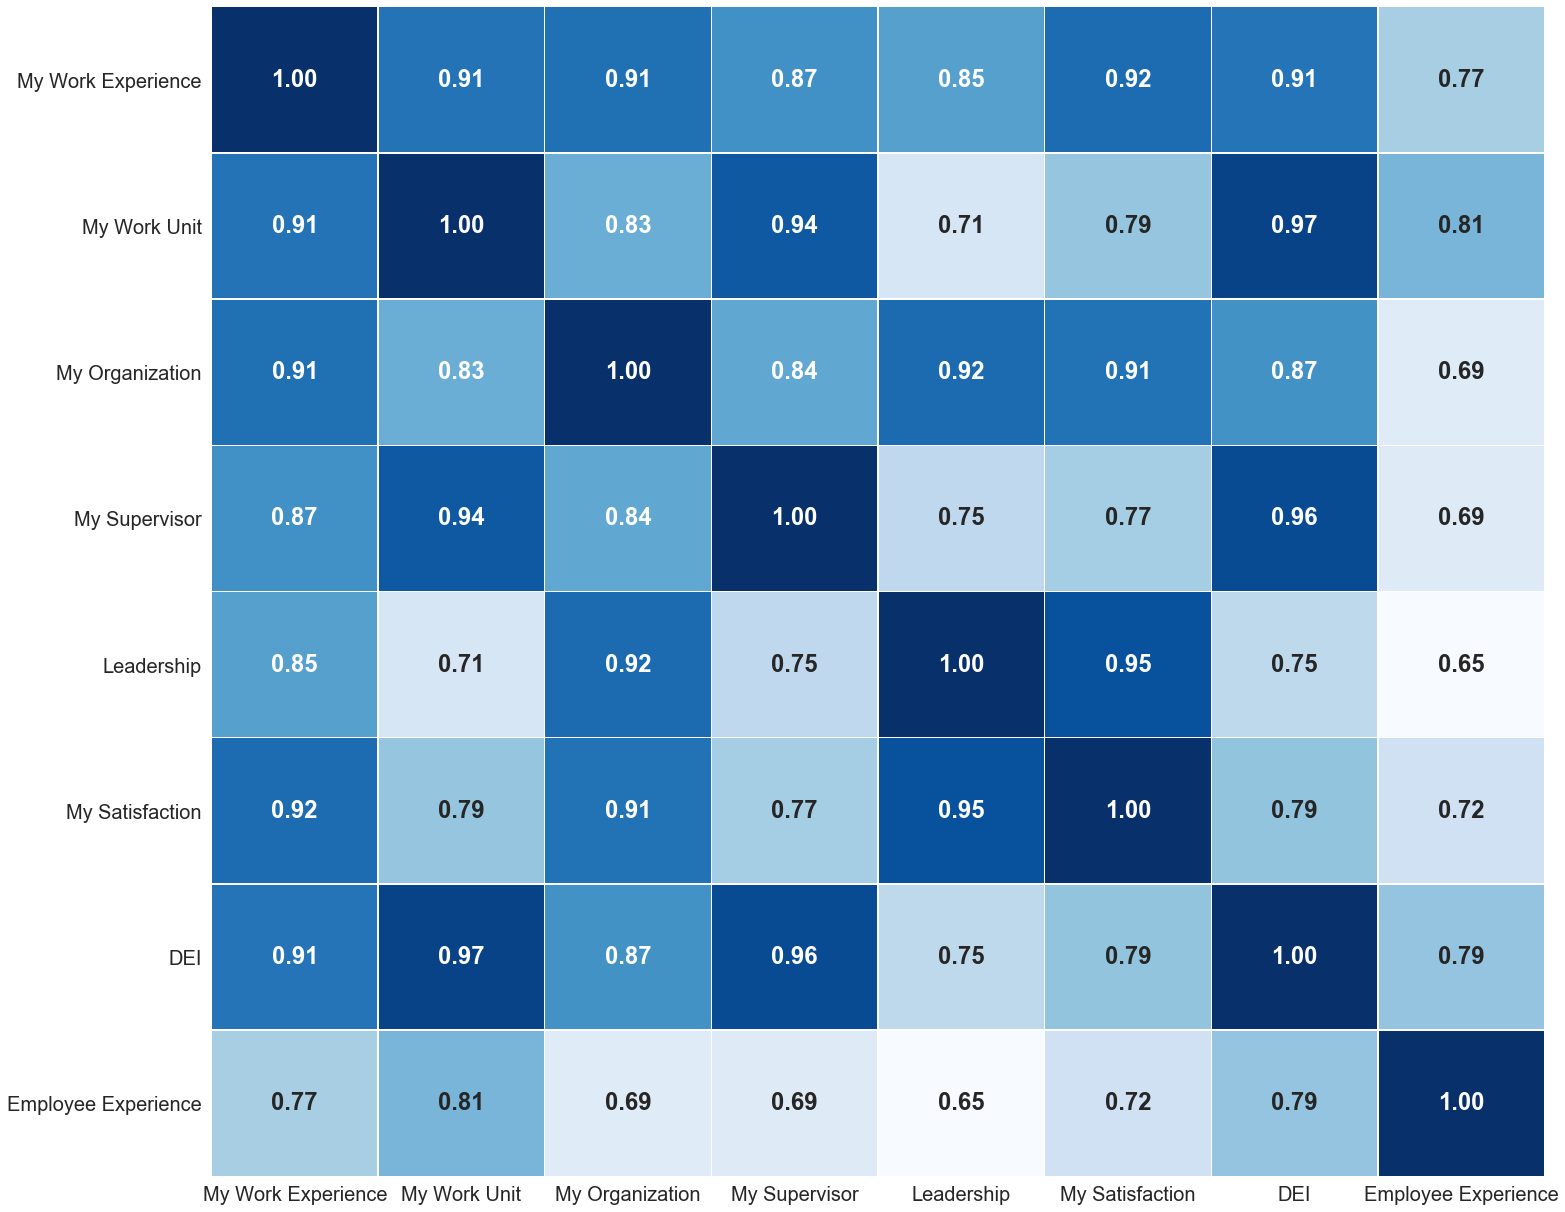

In [240]:
fig, ax = plt.subplots(figsize=(22, 17))
sns.heatmap(agency_indices_corr_matrix, annot=True, cmap='Blues', linewidths=.5, annot_kws={"fontsize": 24, "fontweight": "bold"}, fmt=".2f", cbar=False)
plt.yticks(rotation=0, fontsize = 20)
plt.xticks(rotation=0, fontsize = 20)
plt.tight_layout()
plt.savefig(r'C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\images\fevsindexheatmap.png', dpi=500)
plt.show()


**Merge Agency Indices Database with Indeed Ratings Database

In [199]:
#Import Indeed Ratings Database
indeed_ratings = pd.read_excel(r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\data\indeed_ratings_updated_final.xlsx")

In [200]:
indeed_ratings_merge = indeed_ratings.rename(columns={'Department': 'AGENCY'})

In [205]:
merged_indices_ratings_indeed = pd.merge(merged_indices, indeed_ratings_merge, on='AGENCY', how='inner')

In [206]:
merged_indices_ratings_indeed

,AGENCY,my_work_experience_index,my_work_unit_index,my_organization_index,my_supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index,Unnamed: 0,Overall Rating,Work-Life Balance,Pay & Benefits,Job Security & Advancement,Management,Culture
0,Department of Agriculture,3.681917,3.778819,3.632230,4.157109,3.402016,3.381343,3.859978,3.868381,21,4.1,4.0,4.0,3.6,3.6,3.8
1,Department of Commerce,3.839047,3.864093,3.837819,4.284745,3.568648,3.556084,3.984408,3.934885,0,4.1,4.0,4.0,3.7,3.7,3.9
2,Department of Education,3.820196,3.979420,3.810235,4.345552,3.632828,3.626382,4.012500,4.001667,22,4.5,4.4,3.6,3.7,4.2,4.3
3,Department of Energy,3.909516,4.014278,3.928674,4.332880,3.683964,3.731459,4.059161,3.995171,1,4.0,4.0,3.9,3.7,3.7,3.8
4,Department of Homeland Security,3.641606,3.683334,3.548823,4.057310,3.300381,3.319281,3.736395,3.791333,16,3.8,3.5,4.0,3.5,3.2,3.5
5,Department of Housing and Urban Development,3.861385,3.979773,3.756386,4.307146,3.670732,3.694386,3.990922,3.996003,13,4.0,4.2,4.1,3.7,3.6,3.7
6,Department of Justice,3.683098,3.724516,3.567589,4.043215,3.305478,3.377020,3.765358,3.869712,19,4.1,4.0,4.0,3.9,3.7,3.9
7,Department of Labor,3.809498,3.926270,3.894003,4.278426,3.666771,3.624555,3.985869,3.998836,2,3.8,3.9,3.8,3.5,3.6,3.6
8,Department of State,3.671787,3.806312,3.643069,4.073497,3.441223,3.448808,3.828897,3.911847,14,4.2,4.0,4.1,3.8,3.7,3.9
9,Department of Transportation,3.796373,3.881084,3.812681,4.226878,3.521783,3.598480,3.937091,3.955737,25,4.1,4.0,4.1,3.8,3.7,3.8


In [207]:
merged_indices_ratings_indeed = merged_indices_ratings_indeed.drop('Unnamed: 0', axis=1)

**Correlation of Indices and Ratings

In [208]:
indices_ratings_indeed_corr_matrix = merged_indices_ratings_indeed.corr()

In [209]:
indices_ratings_indeed_corr_matrix

,my_work_experience_index,my_work_unit_index,my_organization_index,my_supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index,Overall Rating,Work-Life Balance,Pay & Benefits,Job Security & Advancement,Management,Culture
my_work_experience_index,1.000000,0.910030,0.914500,0.875620,0.848676,0.922863,0.916089,0.778743,0.395131,0.477015,-0.104601,0.086622,0.373310,0.325149
my_work_unit_index,0.910030,1.000000,0.833688,0.946937,0.707092,0.788894,0.981187,0.824683,0.405642,0.619979,-0.250427,0.038851,0.433456,0.346892
my_organization_index,0.914500,0.833688,1.000000,0.846341,0.920576,0.913325,0.877438,0.695736,0.289331,0.410109,-0.173602,0.011473,0.357053,0.255008
my_supervisor_index,0.875620,0.946937,0.846341,1.000000,0.745185,0.772845,0.968900,0.707928,0.221089,0.566736,-0.386548,-0.088230,0.309288,0.180048
leadership_index,0.848676,0.707092,0.920576,0.745185,1.000000,0.954239,0.750054,0.647639,0.234401,0.369067,-0.202548,-0.064641,0.284267,0.163396
my_satisfaction_index,0.922863,0.788894,0.913325,0.772845,0.954239,1.000000,0.796236,0.720987,0.338333,0.471808,-0.160745,-0.002566,0.335036,0.256788
dei_index,0.916089,0.981187,0.877438,0.968900,0.750054,0.796236,1.000000,0.798571,0.372130,0.622411,-0.267185,0.063129,0.426700,0.330104
employee_experience_index,0.778743,0.824683,0.695736,0.707928,0.647639,0.720987,0.798571,1.000000,0.568870,0.577565,-0.167731,0.012538,0.535580,0.457063
Overall Rating,0.395131,0.405642,0.289331,0.221089,0.234401,0.338333,0.372130,0.568870,1.000000,0.599494,0.314855,0.590264,0.915143,0.963579
Work-Life Balance,0.477015,0.619979,0.410109,0.566736,0.369067,0.471808,0.622411,0.577565,0.599494,1.000000,-0.257191,0.333205,0.643187,0.599695


In [213]:
subset_ratings_indeed_corr = indices_ratings_indeed_corr_matrix.loc[['Overall Rating', 'Work-Life Balance', 'Pay & Benefits', 'Job Security & Advancement','Management','Culture'], ['my_work_experience_index', 'my_work_unit_index', 'my_organization_index','my_supervisor_index', 'leadership_index', 'my_satisfaction_index', 'dei_index', 'employee_experience_index']]

In [216]:
subset_ratings_indeed_corr = subset_ratings_indeed_corr.rename(columns={'my_work_experience_index': 'My Work Experience', 'my_work_unit_index': 'My Work Unit', 'my_organization_index': 'My Organization', 'my_supervisor_index': 'My Supervisor', 'leadership_index': 'Leadership', 'my_satisfaction_index': 'My Satisfaction', 'dei_index': 'DEI', 'employee_experience_index': 'Employee Experience'})

In [219]:
subset_ratings_indeed_corr_swap = subset_ratings_indeed_corr.transpose()

In [230]:
subset_ratings_indeed_corr_swap = subset_ratings_indeed_corr_swap.rename(columns={'Job Security & Advancement': 'Job Sec. & Advancement'})

**Indices - Ratings - Correlation Graph

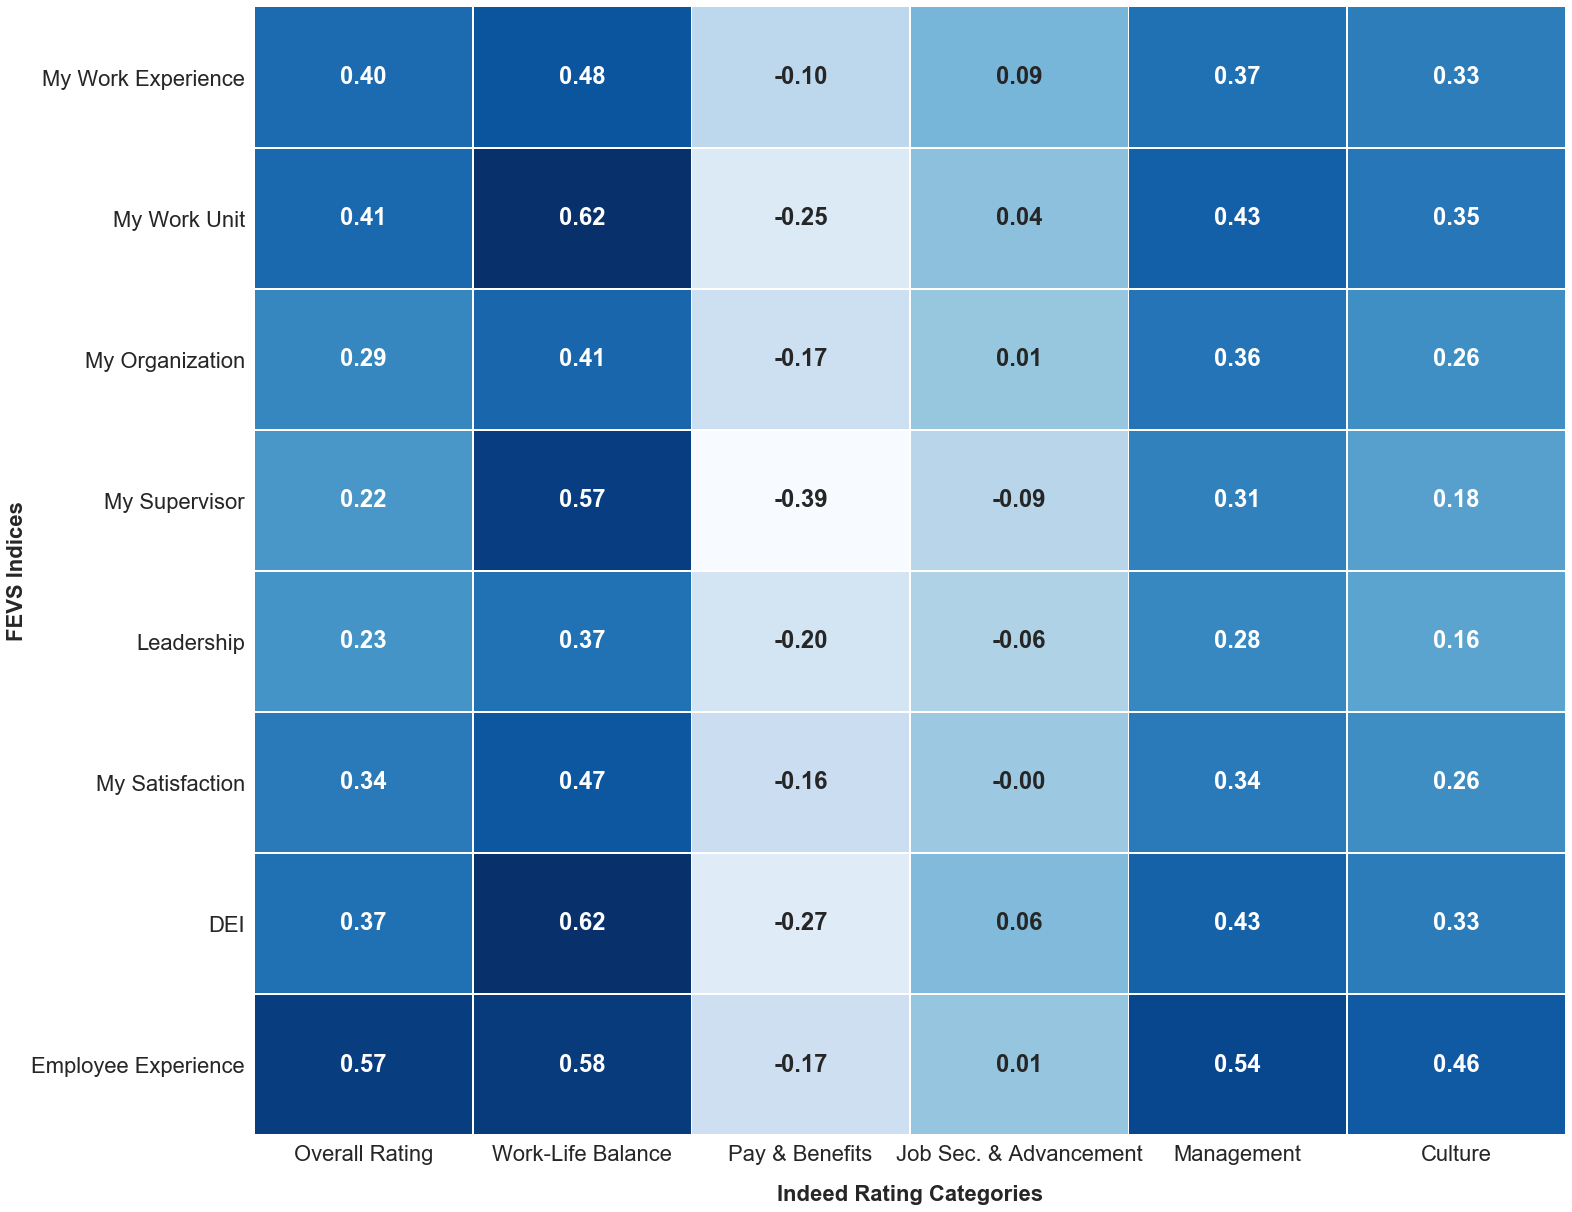

In [238]:
fig, ax = plt.subplots(figsize=(22, 17))
sns.heatmap(subset_ratings_indeed_corr_swap, annot=True, cmap='Blues', linewidths=.5, annot_kws={"fontsize": 24, "fontweight": "bold"}, fmt=".2f", cbar=False)
plt.yticks(rotation=0, fontsize = 22)
plt.xticks(rotation=0, fontsize = 22)
ax.set_xlabel("Indeed Rating Categories", fontsize=22, fontweight="bold", labelpad=20)
ax.set_ylabel("FEVS Indices", fontsize=22, fontweight="bold")
plt.tight_layout()
plt.savefig(r'C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\images\indeed_index_heatmap.png', dpi=500)
plt.show()

In [ ]:
merged_indices_ratings_indeed

**Merge Glassdoor Ratings with Indices

In [241]:
#Import Indeed Ratings Database
glassdoor_ratings = pd.read_excel(r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\data\glassdoor_ratings_updated_final.xlsx")

In [247]:
glassdoor_ratings_merge = glassdoor_ratings.rename(columns={'Department': 'AGENCY'})

In [248]:
merged_indices_ratings_glassdoor = pd.merge(merged_indices, glassdoor_ratings_merge, on='AGENCY', how='inner')

In [249]:
merged_indices_ratings_glassdoor

,AGENCY,my_work_experience_index,my_work_unit_index,my_organization_index,my_supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index,Unnamed: 0,Overall Rating,Job Security & Advancement,Pay & Benefits,Culture,Management,Work-Life Balance
0,Department of Agriculture,3.681917,3.778819,3.632230,4.157109,3.402016,3.381343,3.859978,3.868381,21,3.8,3.6,3.9,3.6,3.3,4.0
1,Department of Commerce,3.839047,3.864093,3.837819,4.284745,3.568648,3.556084,3.984408,3.934885,0,3.9,3.7,3.7,3.9,3.9,4.0
2,Department of Education,3.820196,3.979420,3.810235,4.345552,3.632828,3.626382,4.012500,4.001667,22,4.0,3.4,3.7,3.7,3.3,4.3
3,Department of Energy,3.909516,4.014278,3.928674,4.332880,3.683964,3.731459,4.059161,3.995171,1,4.2,4.2,4.3,4.0,3.6,4.3
4,Department of Homeland Security,3.641606,3.683334,3.548823,4.057310,3.300381,3.319281,3.736395,3.791333,16,3.9,3.9,4.1,3.5,3.2,3.6
5,Department of Housing and Urban Development,3.861385,3.979773,3.756386,4.307146,3.670732,3.694386,3.990922,3.996003,13,3.8,3.8,4.1,3.8,3.5,4.1
6,Department of Justice,3.683098,3.724516,3.567589,4.043215,3.305478,3.377020,3.765358,3.869712,19,4.1,3.9,3.9,4.0,3.4,3.8
7,Department of Labor,3.809498,3.926270,3.894003,4.278426,3.666771,3.624555,3.985869,3.998836,2,3.7,3.6,3.8,3.4,3.2,4.0
8,Department of State,3.671787,3.806312,3.643069,4.073497,3.441223,3.448808,3.828897,3.911847,14,4.1,3.9,3.9,3.8,3.4,3.6
9,Department of Transportation,3.796373,3.881084,3.812681,4.226878,3.521783,3.598480,3.937091,3.955737,25,4.3,3.9,3.9,4.0,3.7,4.4


In [250]:
merged_indices_ratings_glassdoor = merged_indices_ratings_glassdoor.drop('Unnamed: 0', axis=1)

In [251]:
merged_indices_ratings_glassdoor_corr = merged_indices_ratings_glassdoor.corr()

In [252]:
merged_indices_ratings_glassdoor_corr

,my_work_experience_index,my_work_unit_index,my_organization_index,my_supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index,Overall Rating,Job Security & Advancement,Pay & Benefits,Culture,Management,Work-Life Balance
my_work_experience_index,1.000000,0.910030,0.914500,0.875620,0.848676,0.922863,0.916089,0.778743,0.084263,0.017180,-0.102688,0.163242,0.171014,0.212469
my_work_unit_index,0.910030,1.000000,0.833688,0.946937,0.707092,0.788894,0.981187,0.824683,0.156956,0.010459,-0.079263,0.217456,0.265778,0.365729
my_organization_index,0.914500,0.833688,1.000000,0.846341,0.920576,0.913325,0.877438,0.695736,-0.013116,-0.081597,-0.212126,0.041437,0.111362,0.150279
my_supervisor_index,0.875620,0.946937,0.846341,1.000000,0.745185,0.772845,0.968900,0.707928,0.183857,-0.006195,-0.027675,0.238058,0.336169,0.486643
leadership_index,0.848676,0.707092,0.920576,0.745185,1.000000,0.954239,0.750054,0.647639,-0.006799,-0.072023,-0.128866,0.066981,0.111938,0.165983
my_satisfaction_index,0.922863,0.788894,0.913325,0.772845,0.954239,1.000000,0.796236,0.720987,0.040777,-0.036817,-0.151829,0.124598,0.127302,0.221383
dei_index,0.916089,0.981187,0.877438,0.968900,0.750054,0.796236,1.000000,0.798571,0.119185,-0.003256,-0.108253,0.193315,0.265579,0.359907
employee_experience_index,0.778743,0.824683,0.695736,0.707928,0.647639,0.720987,0.798571,1.000000,-0.045589,-0.215427,-0.237270,0.053788,0.100849,0.151417
Overall Rating,0.084263,0.156956,-0.013116,0.183857,-0.006799,0.040777,0.119185,-0.045589,1.000000,0.829604,0.788704,0.960317,0.890379,0.629419
Job Security & Advancement,0.017180,0.010459,-0.081597,-0.006195,-0.072023,-0.036817,-0.003256,-0.215427,0.829604,1.000000,0.820434,0.830187,0.714775,0.338327


In [253]:
subset_ratings_glassdoor_corr = merged_indices_ratings_glassdoor_corr.loc[['Overall Rating', 'Work-Life Balance', 'Pay & Benefits', 'Job Security & Advancement','Management','Culture'], ['my_work_experience_index', 'my_work_unit_index', 'my_organization_index','my_supervisor_index', 'leadership_index', 'my_satisfaction_index', 'dei_index', 'employee_experience_index']]

In [256]:
subset_ratings_glassdoor_corr

,my_work_experience_index,my_work_unit_index,my_organization_index,my_supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index
Overall Rating,0.084263,0.156956,-0.013116,0.183857,-0.006799,0.040777,0.119185,-0.045589
Work-Life Balance,0.212469,0.365729,0.150279,0.486643,0.165983,0.221383,0.359907,0.151417
Pay & Benefits,-0.102688,-0.079263,-0.212126,-0.027675,-0.128866,-0.151829,-0.108253,-0.237270
Job Security & Advancement,0.017180,0.010459,-0.081597,-0.006195,-0.072023,-0.036817,-0.003256,-0.215427
Management,0.171014,0.265778,0.111362,0.336169,0.111938,0.127302,0.265579,0.100849
Culture,0.163242,0.217456,0.041437,0.238058,0.066981,0.124598,0.193315,0.053788


In [257]:
subset_ratings_glassdoor_corr = subset_ratings_glassdoor_corr.rename(columns={'my_work_experience_index': 'My Work Experience', 'my_work_unit_index': 'My Work Unit', 'my_organization_index': 'My Organization', 'my_supervisor_index': 'My Supervisor', 'leadership_index': 'Leadership', 'my_satisfaction_index': 'My Satisfaction', 'dei_index': 'DEI', 'employee_experience_index': 'Employee Experience'})

In [259]:
subset_ratings_glassdoor_corr_swap = subset_ratings_glassdoor_corr.transpose()

In [261]:
subset_ratings_glassdoor_corr_swap = subset_ratings_glassdoor_corr_swap.rename(columns={'Job Security & Advancement':'Job Sec. & Advancement'})

In [262]:
subset_ratings_glassdoor_corr_swap

,Overall Rating,Work-Life Balance,Pay & Benefits,Job Sec. & Advancement,Management,Culture
My Work Experience,0.084263,0.212469,-0.102688,0.017180,0.171014,0.163242
My Work Unit,0.156956,0.365729,-0.079263,0.010459,0.265778,0.217456
My Organization,-0.013116,0.150279,-0.212126,-0.081597,0.111362,0.041437
My Supervisor,0.183857,0.486643,-0.027675,-0.006195,0.336169,0.238058
Leadership,-0.006799,0.165983,-0.128866,-0.072023,0.111938,0.066981
My Satisfaction,0.040777,0.221383,-0.151829,-0.036817,0.127302,0.124598
DEI,0.119185,0.359907,-0.108253,-0.003256,0.265579,0.193315
Employee Experience,-0.045589,0.151417,-0.237270,-0.215427,0.100849,0.053788


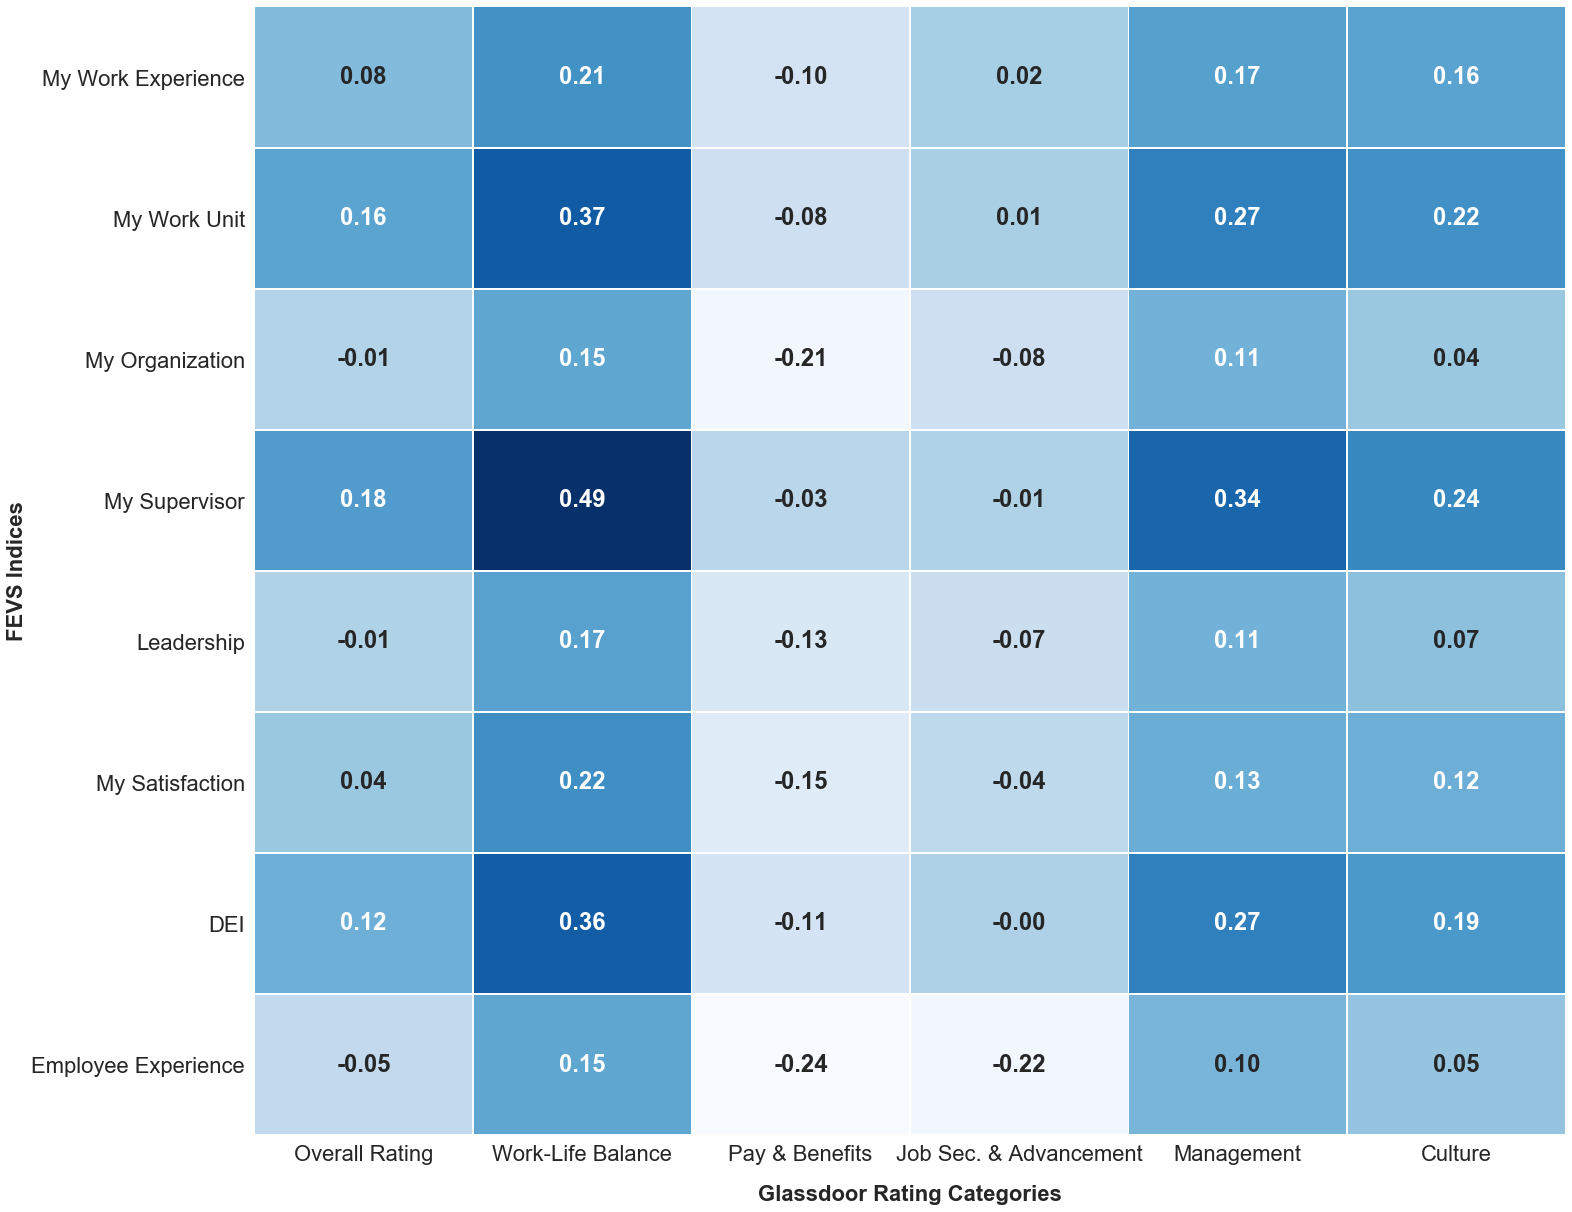

In [263]:
fig, ax = plt.subplots(figsize=(22, 17))
sns.heatmap(subset_ratings_glassdoor_corr_swap, annot=True, cmap='Blues', linewidths=.5, annot_kws={"fontsize": 24, "fontweight": "bold"}, fmt=".2f", cbar=False)
plt.yticks(rotation=0, fontsize = 22)
plt.xticks(rotation=0, fontsize = 22)
ax.set_xlabel("Glassdoor Rating Categories", fontsize=22, fontweight="bold", labelpad=20)
ax.set_ylabel("FEVS Indices", fontsize=22, fontweight="bold")
plt.tight_layout()
plt.savefig(r'C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\images\glassdoor_index_heatmap.png', dpi=500)
plt.show()

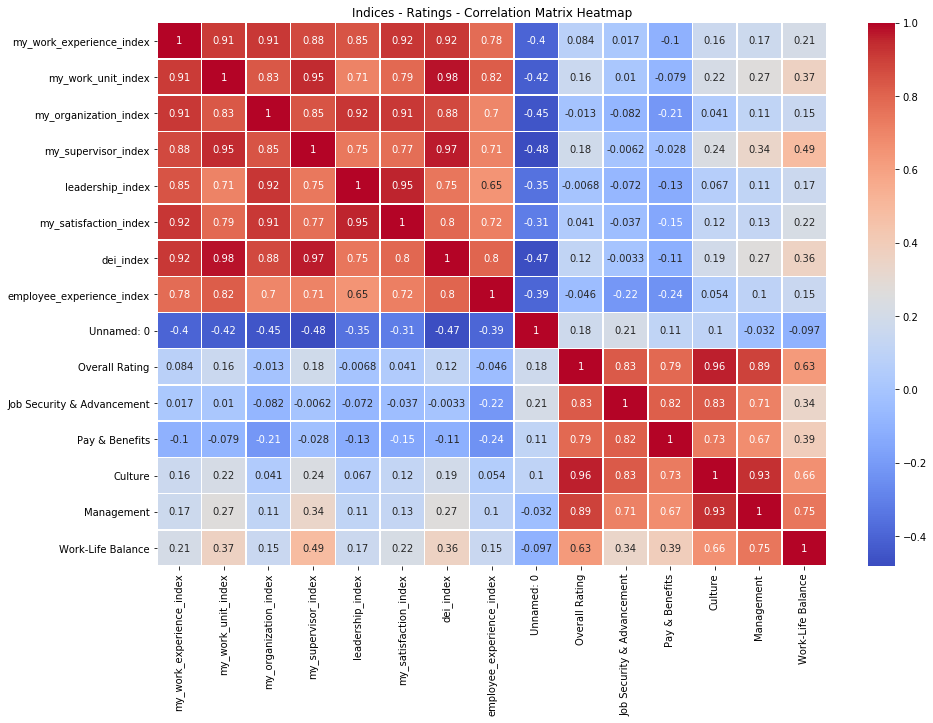

In [115]:
plt.figure(figsize=(15, 10))
sns.heatmap(indices_ratings_glasdoor_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Indices - Ratings - Correlation Matrix Heatmap')
plt.show()

In [116]:
glassdoor_ratings

,Unnamed: 0,Department,Overall Rating,Job Security & Advancement,Pay & Benefits,Culture,Management,Work-Life Balance
0,0,Department of Commerce,3.9,3.7,3.7,3.9,3.9,4.0
1,1,Department of Energy,4.2,4.2,4.3,4.0,3.6,4.3
2,2,Department of Labor,3.7,3.6,3.8,3.4,3.2,4.0
3,3,Equal Employment Opportunity Commission,3.8,3.5,4.1,3.7,3.4,4.0
4,4,Federal Energy Regulatory Commission,4.5,4.3,4.1,4.4,4.1,4.4
5,5,Federal Trade Commission,4.1,3.9,3.9,3.9,3.7,4.2
6,6,National Credit Union Administration,3.7,3.4,3.9,3.3,3.1,3.3
7,7,National Science Foundation,2.6,2.6,2.7,2.5,2.1,2.8
8,8,Nuclear Regulatory Commission,4.2,3.7,3.9,3.9,3.3,4.2
9,9,Office Of Personnel Management,3.8,3.2,3.9,3.9,3.5,4.5


**Compare Indeed and Glassdoor

In [264]:
glassdoor_ratings_comp = pd.read_excel(r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\data\glassdoor_ratings_specified.xlsx")

In [265]:
indeed_ratings_comp = pd.read_excel(r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\data\indeed_ratings_specified.xlsx")

In [266]:
merged_indices_ratings_compare = pd.merge(glassdoor_ratings_comp, indeed_ratings_comp, on='Department', how='inner')

In [267]:
merged_indices_ratings_compare

,Unnamed: 0_x,Department,Overall Rating - Glassdoor,Job Security & Advancement - Glassdoor,Pay & Benefits - Glassdoor,Culture - Glassdoor,Management - Glassdoor,Work-Life Balance - Glassdoor,Unnamed: 0_y,Overall Rating - Indeed,Work-Life Balance - Indeed,Pay & Benefits - Indeed,Job Security & Advancement - Indeed,Management - Indeed,Culture - Indeed
0,0,Department of Commerce,3.9,3.7,3.7,3.9,3.9,4.0,0,4.1,4.0,4.0,3.7,3.7,3.9
1,1,Department of Energy,4.2,4.2,4.3,4.0,3.6,4.3,1,4.0,4.0,3.9,3.7,3.7,3.8
2,2,Department of Labor,3.7,3.6,3.8,3.4,3.2,4.0,2,3.8,3.9,3.8,3.5,3.6,3.6
3,3,Equal Employment Opportunity Commission,3.8,3.5,4.1,3.7,3.4,4.0,3,4.3,4.2,3.9,3.8,4.0,4.0
4,4,Federal Energy Regulatory Commission,4.5,4.3,4.1,4.4,4.1,4.4,4,3.9,4.1,3.8,3.7,3.5,3.6
5,5,Federal Trade Commission,4.1,3.9,3.9,3.9,3.7,4.2,5,4.4,4.4,4.0,4.1,4.0,4.2
6,6,National Credit Union Administration,3.7,3.4,3.9,3.3,3.1,3.3,6,4.0,3.9,4.1,3.6,3.9,3.9
7,7,National Science Foundation,2.6,2.6,2.7,2.5,2.1,2.8,7,4.7,4.6,4.1,4.1,4.2,4.5
8,8,Nuclear Regulatory Commission,4.2,3.7,3.9,3.9,3.3,4.2,8,4.0,4.1,4.2,3.8,3.5,3.7
9,9,Office Of Personnel Management,3.8,3.2,3.9,3.9,3.5,4.5,9,3.8,3.9,3.9,3.5,3.4,3.5


In [268]:
ratings_compare_corr_matrix = merged_indices_ratings_compare.corr()

In [269]:
ratings_compare_corr_matrix

,Unnamed: 0_x,Overall Rating - Glassdoor,Job Security & Advancement - Glassdoor,Pay & Benefits - Glassdoor,Culture - Glassdoor,Management - Glassdoor,Work-Life Balance - Glassdoor,Unnamed: 0_y,Overall Rating - Indeed,Work-Life Balance - Indeed,Pay & Benefits - Indeed,Job Security & Advancement - Indeed,Management - Indeed,Culture - Indeed
Unnamed: 0_x,1.000000,0.179748,0.228222,0.112527,0.093607,-0.038271,-0.117129,1.000000,0.177236,-0.081547,0.247119,0.185535,0.047793,0.139861
Overall Rating - Glassdoor,0.179748,1.000000,0.814938,0.787189,0.948382,0.883443,0.595474,0.179748,-0.083449,-0.031601,-0.077775,-0.009621,-0.066183,-0.100722
Job Security & Advancement - Glassdoor,0.228222,0.814938,1.000000,0.791986,0.772923,0.672742,0.253990,0.228222,-0.031600,-0.108324,0.193591,0.347083,-0.015603,0.025514
Pay & Benefits - Glassdoor,0.112527,0.787189,0.791986,1.000000,0.728840,0.673265,0.381146,0.112527,-0.328973,-0.362978,0.033977,-0.046039,-0.261356,-0.312376
Culture - Glassdoor,0.093607,0.948382,0.772923,0.728840,1.000000,0.933579,0.661407,0.093607,-0.037110,0.110376,-0.095699,0.062255,-0.016763,-0.049035
Management - Glassdoor,-0.038271,0.883443,0.672742,0.673265,0.933579,1.000000,0.739114,-0.038271,-0.161920,0.090737,-0.259069,-0.135600,-0.111358,-0.177856
Work-Life Balance - Glassdoor,-0.117129,0.595474,0.253990,0.381146,0.661407,0.739114,1.000000,-0.117129,-0.299415,0.330464,-0.668213,-0.371211,-0.224576,-0.333681
Unnamed: 0_y,1.000000,0.179748,0.228222,0.112527,0.093607,-0.038271,-0.117129,1.000000,0.177236,-0.081547,0.247119,0.185535,0.047793,0.139861
Overall Rating - Indeed,0.177236,-0.083449,-0.031600,-0.328973,-0.037110,-0.161920,-0.299415,0.177236,1.000000,0.600378,0.336368,0.605500,0.919734,0.965810
Work-Life Balance - Indeed,-0.081547,-0.031601,-0.108324,-0.362978,0.110376,0.090737,0.330464,-0.081547,0.600378,1.000000,-0.241571,0.341958,0.643827,0.600342


In [280]:
subset_ratings_glassdoor_indeed_corr = ratings_compare_corr_matrix.loc[['Overall Rating - Indeed', 'Work-Life Balance - Indeed', 'Pay & Benefits - Indeed', 'Job Security & Advancement - Indeed','Management - Indeed','Culture - Indeed'],['Overall Rating - Glassdoor', 'Work-Life Balance - Glassdoor', 'Pay & Benefits - Glassdoor', 'Job Security & Advancement - Glassdoor','Management - Glassdoor','Culture - Glassdoor']]

In [281]:
subset_ratings_glassdoor_indeed_corr = subset_ratings_glassdoor_indeed_corr.rename(columns={'Job Security & Advancement - Glassdoor':'Job Sec. & Advancement - Glassdoor'})

In [282]:
subset_ratings_glassdoor_indeed_corr = subset_ratings_glassdoor_indeed_corr.rename(columns={'Job Security & Advancement - Indeed':'Job Sec. & Advancement - Indeed'})

In [283]:
subset_ratings_glassdoor_indeed_corr

,Overall Rating - Glassdoor,Work-Life Balance - Glassdoor,Pay & Benefits - Glassdoor,Job Sec. & Advancement - Glassdoor,Management - Glassdoor,Culture - Glassdoor
Overall Rating - Indeed,-0.083449,-0.299415,-0.328973,-0.031600,-0.161920,-0.037110
Work-Life Balance - Indeed,-0.031601,0.330464,-0.362978,-0.108324,0.090737,0.110376
Pay & Benefits - Indeed,-0.077775,-0.668213,0.033977,0.193591,-0.259069,-0.095699
Job Security & Advancement - Indeed,-0.009621,-0.371211,-0.046039,0.347083,-0.135600,0.062255
Management - Indeed,-0.066183,-0.224576,-0.261356,-0.015603,-0.111358,-0.016763
Culture - Indeed,-0.100722,-0.333681,-0.312376,0.025514,-0.177856,-0.049035


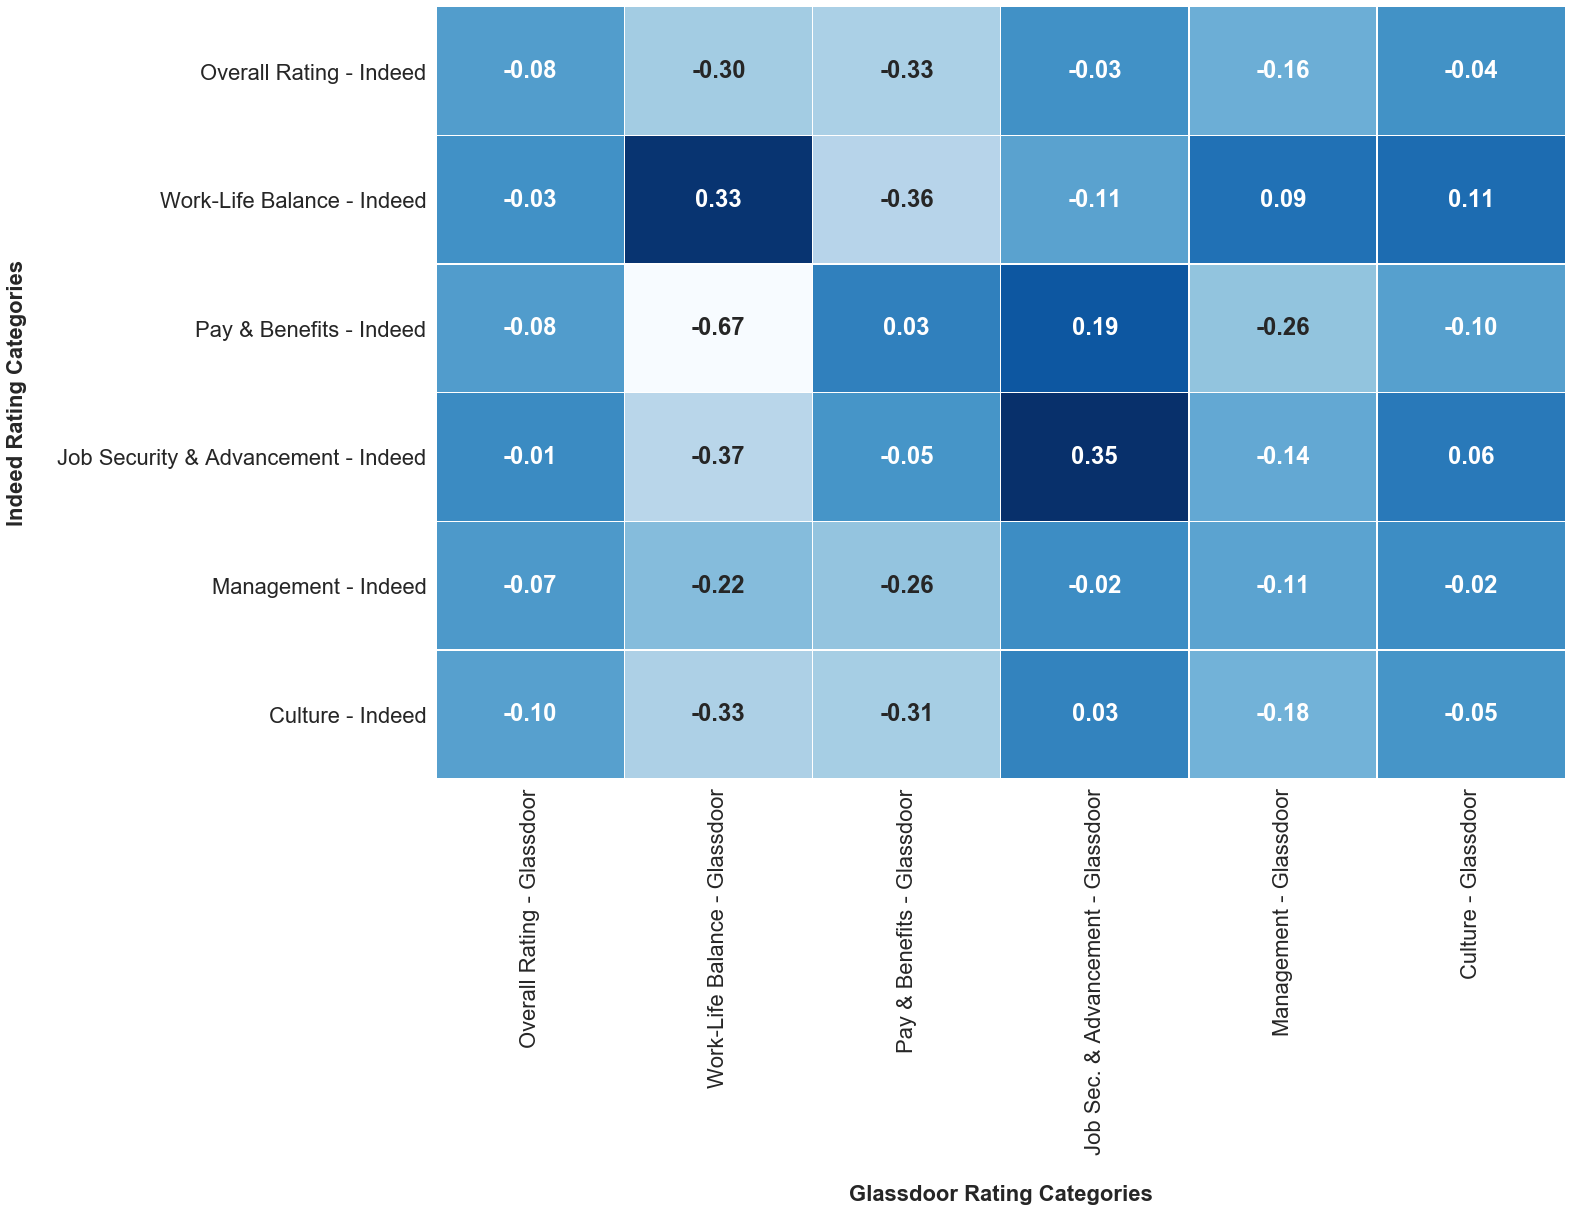

In [284]:
fig, ax = plt.subplots(figsize=(22, 17))
sns.heatmap(subset_ratings_glassdoor_indeed_corr, annot=True, cmap='Blues', linewidths=.5, annot_kws={"fontsize": 24, "fontweight": "bold"}, fmt=".2f", cbar=False)
plt.yticks(rotation=0, fontsize = 22)
plt.xticks(rotation=90, fontsize = 22)
ax.set_xlabel("Glassdoor Rating Categories", fontsize=22, fontweight="bold", labelpad=30)
ax.set_ylabel("Indeed Rating Categories", fontsize=22, fontweight="bold", labelpad=30)
plt.tight_layout()
plt.savefig(r'C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\images\glassdoor_indeed_index_heatmap.png', dpi=500)
plt.show()

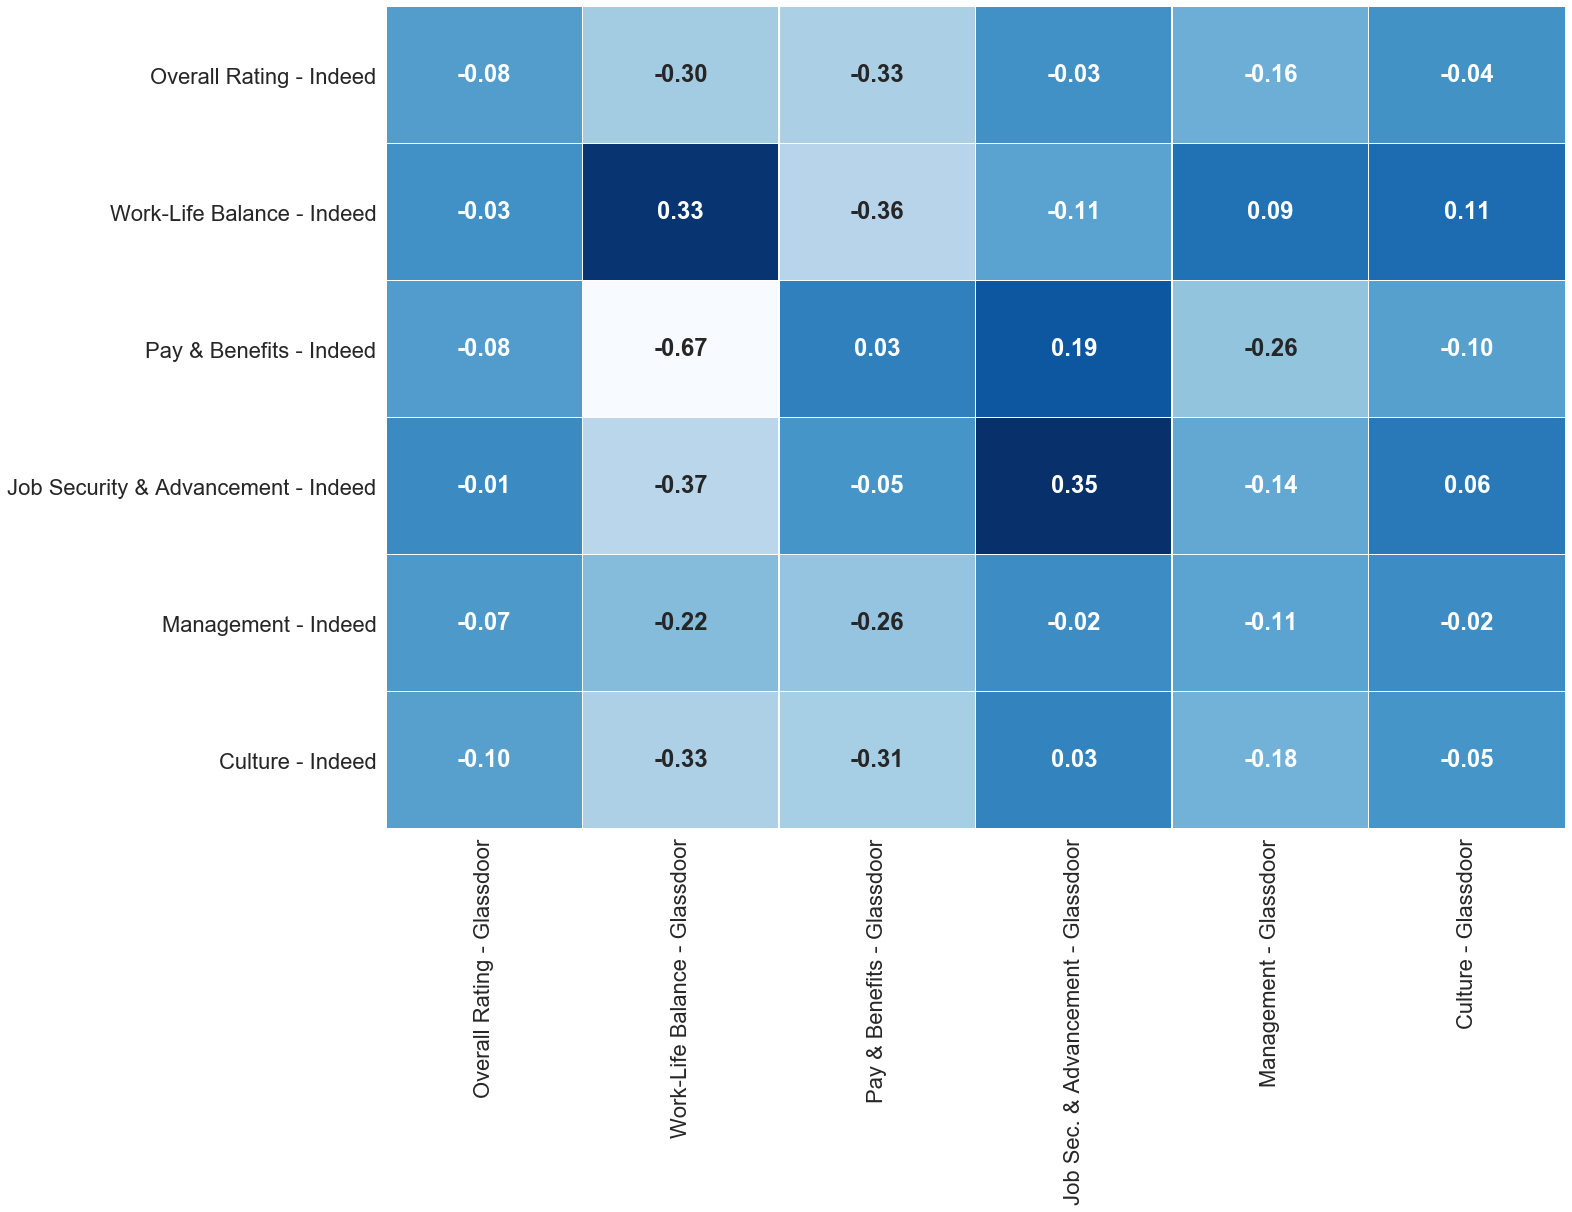

In [285]:
fig, ax = plt.subplots(figsize=(22, 17))
sns.heatmap(subset_ratings_glassdoor_indeed_corr, annot=True, cmap='Blues', linewidths=.5, annot_kws={"fontsize": 24, "fontweight": "bold"}, fmt=".2f", cbar=False)
plt.yticks(rotation=0, fontsize = 22)
plt.xticks(rotation=90, fontsize = 22)
plt.tight_layout()
plt.savefig(r'C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\images\glassdoor_indeed_index_heatmap.png', dpi=500)
plt.show()

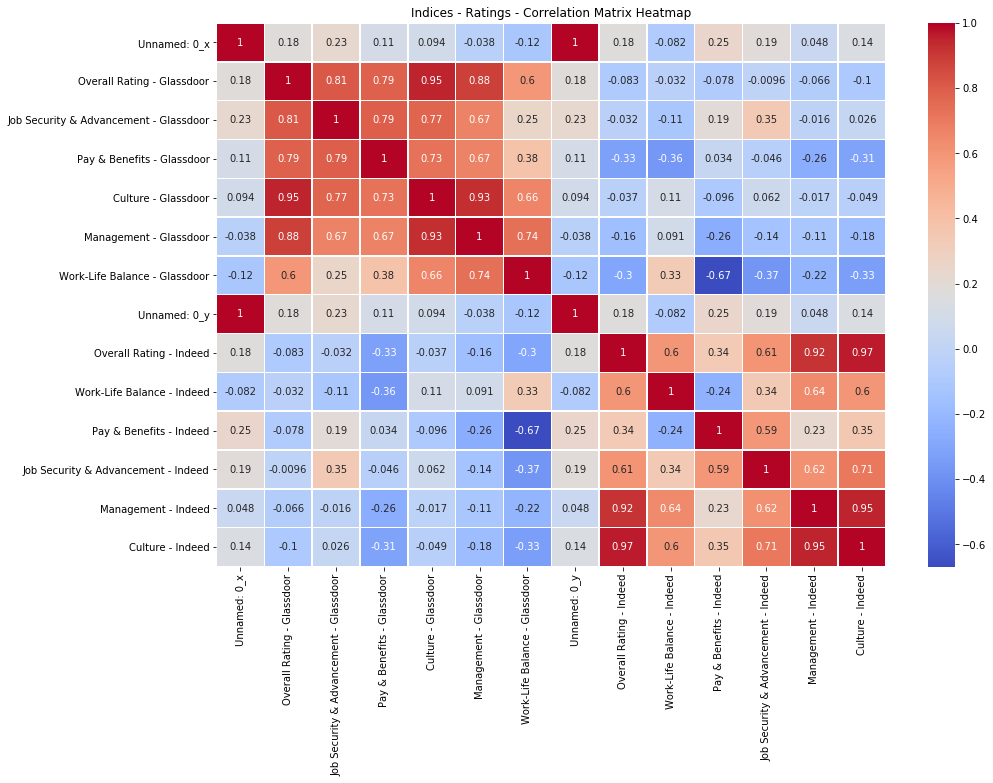

In [123]:
plt.figure(figsize=(15, 10))
sns.heatmap(ratings_compare_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Indices - Ratings - Correlation Matrix Heatmap')
plt.show()

**IMPORT EMPLOYMENT DATABASE

In [12]:
file_path = r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\nss-capstone\data\FACTDATA_SEP2023.TXT"

In [13]:
employment = pd.read_csv(file_path, header=None)

C:\Users\AaronH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,6,7,8,12,13,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
employment

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
1,AA00,11,F,13,NaN,G,0340,2,ES,ES-**,T,XXXX,2,50,F,1,202309,1,210000,20.3
2,AA00,11,I,15,NaN,I,0905,1,ES,ES-**,T,XXXX,2,50,F,1,202309,1,203000,30.7
3,AA00,11,F,04,14,E,0905,1,99,GS-14,Q,XXXX,8,30,F,1,202309,1,172075,14.1
4,AA00,11,E,15,NaN,E,0905,1,ES,ES-**,S,XXXX,8,50,F,1,202309,1,195000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258817,ZS00,11,C,4,NaN,B,0301,2,99,AD-00,F,XXXX,8,48,F,2,202309,1,67500,2.5
2258818,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,R,XXXX,8,48,I,2,202309,1,184115,0.7
2258819,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202309,1,50000,0.4
2258820,ZS00,11,C,13,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202309,1,56000,0.4


In [68]:
employment_table = employment

In [69]:
employment_table.columns = employment_table.iloc[0]

In [70]:
employment_table = employment_table[1:]

In [71]:
employment_table

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
1,AA00,11,F,13,NaN,G,0340,2,ES,ES-**,T,XXXX,2,50,F,1,202309,1,210000,20.3
2,AA00,11,I,15,NaN,I,0905,1,ES,ES-**,T,XXXX,2,50,F,1,202309,1,203000,30.7
3,AA00,11,F,04,14,E,0905,1,99,GS-14,Q,XXXX,8,30,F,1,202309,1,172075,14.1
4,AA00,11,E,15,NaN,E,0905,1,ES,ES-**,S,XXXX,8,50,F,1,202309,1,195000,12.0
5,AA00,11,G,15,14,E,0905,1,99,GS-14,O,XXXX,8,30,F,1,202309,1,150016,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258817,ZS00,11,C,4,NaN,B,0301,2,99,AD-00,F,XXXX,8,48,F,2,202309,1,67500,2.5
2258818,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,R,XXXX,8,48,I,2,202309,1,184115,0.7
2258819,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202309,1,50000,0.4
2258820,ZS00,11,C,13,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202309,1,56000,0.4


In [72]:
employment_table['agency'] = employment_table['AGYSUB'].apply(lambda x: x[:2] if x != 'DNFE' else x)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
employment_table

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS,agency
1,AA00,11,F,13,NaN,G,0340,2,ES,ES-**,...,XXXX,2,50,F,1,202309,1,210000,20.3,AA
2,AA00,11,I,15,NaN,I,0905,1,ES,ES-**,...,XXXX,2,50,F,1,202309,1,203000,30.7,AA
3,AA00,11,F,04,14,E,0905,1,99,GS-14,...,XXXX,8,30,F,1,202309,1,172075,14.1,AA
4,AA00,11,E,15,NaN,E,0905,1,ES,ES-**,...,XXXX,8,50,F,1,202309,1,195000,12.0,AA
5,AA00,11,G,15,14,E,0905,1,99,GS-14,...,XXXX,8,30,F,1,202309,1,150016,11.3,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258817,ZS00,11,C,4,NaN,B,0301,2,99,AD-00,...,XXXX,8,48,F,2,202309,1,67500,2.5,ZS
2258818,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,...,XXXX,8,48,I,2,202309,1,184115,0.7,ZS
2258819,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,...,XXXX,8,48,F,2,202309,1,50000,0.4,ZS
2258820,ZS00,11,C,13,NaN,A,0301,2,99,AD-00,...,XXXX,8,48,F,2,202309,1,56000,0.4,ZS


In [74]:
agency_map = {'AF': 'United States Department of the Air Force', 'AG': 'Department of Agriculture', 'AM':'U.S. Agency for International Development', 
             'AR':'United States Department of the Army','CM':'Department of Commerce','CU':'National Credit Union Administration','DD':'OSD, Joint Staff, Defense Agencies, and Field Activities',
             'DJ':'Department of Justice','DL':'Department of Labor','DN':'Department of Energy', 'DNFE':'Federal Energy Regulatory Commission', 'DR':'Federal Energy Regulatory Commission',
             'ED':'Department of Education','EE':'Equal Employment Opportunity Commission','EP':'Environmental Protection Agency','FT':'Federal Trade Commission',
             'GS':'General Services Administration','HE':'Department of Health and Human Services','HS':'Department of Homeland Security',
             'HU':'Department of Housing and Urban Development','IN':'Department of the Interior','NF':'National Science Foundation','NQ':'National Archives and Records Administration',
             'NU':'Nuclear Regulatory Commission','NV':'United States Department of the Navy','OM':'Office of Personnel Management','SB':'Small Business Administration',
             'ST':'Department of State','SZ':'Social Security Administration','TD':'Department of Transportation','TR':'Department of the Treasury','XX':'All Other Agencies'}

In [75]:
employment_table['AGENCY'] = employment_table['agency'].map(agency_map)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
employment_table

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,...,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS,agency,AGENCY
1,AA00,11,F,13,NaN,G,0340,2,ES,ES-**,...,2,50,F,1,202309,1,210000,20.3,AA,NaN
2,AA00,11,I,15,NaN,I,0905,1,ES,ES-**,...,2,50,F,1,202309,1,203000,30.7,AA,NaN
3,AA00,11,F,04,14,E,0905,1,99,GS-14,...,8,30,F,1,202309,1,172075,14.1,AA,NaN
4,AA00,11,E,15,NaN,E,0905,1,ES,ES-**,...,8,50,F,1,202309,1,195000,12.0,AA,NaN
5,AA00,11,G,15,14,E,0905,1,99,GS-14,...,8,30,F,1,202309,1,150016,11.3,AA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258817,ZS00,11,C,4,NaN,B,0301,2,99,AD-00,...,8,48,F,2,202309,1,67500,2.5,ZS,NaN
2258818,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,...,8,48,I,2,202309,1,184115,0.7,ZS,NaN
2258819,ZS00,11,D,4,NaN,A,0301,2,99,AD-00,...,8,48,F,2,202309,1,50000,0.4,ZS,NaN
2258820,ZS00,11,C,13,NaN,A,0301,2,99,AD-00,...,8,48,F,2,202309,1,56000,0.4,ZS,NaN


In [77]:
employment_table['AGENCY'] = employment_table['AGENCY'].fillna('missing') 

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
groupby = employment_table.groupby('AGENCY').size().reset_index()

In [79]:
groupby

,AGENCY,0
0,Department of Agriculture,95248
1,Department of Commerce,49020
2,Department of Education,4252
3,Department of Energy,14801
4,Department of Health and Human Services,90337
5,Department of Homeland Security,219092
6,Department of Housing and Urban Development,8559
7,Department of Justice,116390
8,Department of Labor,15108
9,Department of State,13814


In [119]:
employment_table['LOS'] = employment_table['LOS'].apply(pd.to_numeric, errors='coerce')

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
groupby_employment = employment_table.groupby('AGENCY')['LOS'].mean().reset_index()

In [121]:
groupby_employment

,AGENCY,LOS
0,Department of Agriculture,12.398677
1,Department of Commerce,12.925910
2,Department of Education,15.125000
3,Department of Energy,14.389676
4,Department of Health and Human Services,12.588123
5,Department of Homeland Security,11.845764
6,Department of Housing and Urban Development,15.201601
7,Department of Justice,12.966167
8,Department of Labor,14.805083
9,Department of State,14.102099


In [281]:
groupby_employment.to_clipboard()

**IMPORT SEPARATIONS DATABASE

In [128]:
file_path = r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\data\SEPDATA_FY2020-2024.TXT"

In [129]:
separations = pd.read_csv(file_path, header=None)

C:\Users\AaronH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,4,5,8,9,13,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
separations

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
1,AA00,SJ,202006,J,18,14,E,11,0905,1,GS-14,L,XXXX,40,F,2,1,125360,12.3
2,AA00,SC,202208,F,15,15,E,51,0905,1,GS-15,Q,XXXX,30,F,1,1,176300,12.9
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,ES-**,S,XXXX,50,F,1,1,199300,12.8
4,AA00,SA,202008,D,14,14,C,11,0905,1,GS-14,L,XXXX,30,F,1,1,121316,04.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,AD-00,Q,XXXX,48,F,2,1,170800,14.5
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,AD-00,K,XXXX,38,F,1,1,112930,8.1
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,AD-00,M,XXXX,38,F,1,1,133465,8
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,AD-00,F,XXXX,38,F,1,1,64682,2.8


In [134]:
separations_table = separations

In [135]:
separations_table.columns = separations_table.iloc[0]

In [137]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
0,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
1,AA00,SJ,202006,J,18,14,E,11,0905,1,GS-14,L,XXXX,40,F,2,1,125360,12.3
2,AA00,SC,202208,F,15,15,E,51,0905,1,GS-15,Q,XXXX,30,F,1,1,176300,12.9
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,ES-**,S,XXXX,50,F,1,1,199300,12.8
4,AA00,SA,202008,D,14,14,C,11,0905,1,GS-14,L,XXXX,30,F,1,1,121316,04.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,AD-00,Q,XXXX,48,F,2,1,170800,14.5
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,AD-00,K,XXXX,38,F,1,1,112930,8.1
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,AD-00,M,XXXX,38,F,1,1,133465,8
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,AD-00,F,XXXX,38,F,1,1,64682,2.8


In [138]:
separations_table = separations_table[1:]

In [139]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS
1,AA00,SJ,202006,J,18,14,E,11,0905,1,GS-14,L,XXXX,40,F,2,1,125360,12.3
2,AA00,SC,202208,F,15,15,E,51,0905,1,GS-15,Q,XXXX,30,F,1,1,176300,12.9
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,ES-**,S,XXXX,50,F,1,1,199300,12.8
4,AA00,SA,202008,D,14,14,C,11,0905,1,GS-14,L,XXXX,30,F,1,1,121316,04.9
5,AA00,SA,202003,D,15,14,D,11,0905,1,GS-14,N,XXXX,40,F,2,1,149621,05.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,AD-00,Q,XXXX,48,F,2,1,170800,14.5
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,AD-00,K,XXXX,38,F,1,1,112930,8.1
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,AD-00,M,XXXX,38,F,1,1,133465,8
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,AD-00,F,XXXX,38,F,1,1,64682,2.8


In [140]:
separations_table['DATE'] = pd.to_datetime(separations_table['EFDATE'], format='%Y%m')

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
separations_table['DATE'] = separations_table['DATE'].dt.to_period('M')

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS,DATE
1,AA00,SJ,202006,J,18,14,E,11,0905,1,GS-14,L,XXXX,40,F,2,1,125360,12.3,2020-06
2,AA00,SC,202208,F,15,15,E,51,0905,1,GS-15,Q,XXXX,30,F,1,1,176300,12.9,2022-08
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,ES-**,S,XXXX,50,F,1,1,199300,12.8,2022-07
4,AA00,SA,202008,D,14,14,C,11,0905,1,GS-14,L,XXXX,30,F,1,1,121316,04.9,2020-08
5,AA00,SA,202003,D,15,14,D,11,0905,1,GS-14,N,XXXX,40,F,2,1,149621,05.3,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,AD-00,Q,XXXX,48,F,2,1,170800,14.5,2021-11
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,AD-00,K,XXXX,38,F,1,1,112930,8.1,2021-07
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,AD-00,M,XXXX,38,F,1,1,133465,8,2021-03
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,AD-00,F,XXXX,38,F,1,1,64682,2.8,2021-07


In [145]:
separations_table['DATE_YEAR'] = separations_table['DATE'].dt.year

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,...,SALLVL,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS,DATE,DATE_YEAR
1,AA00,SJ,202006,J,18,14,E,11,0905,1,...,L,XXXX,40,F,2,1,125360,12.3,2020-06,2020
2,AA00,SC,202208,F,15,15,E,51,0905,1,...,Q,XXXX,30,F,1,1,176300,12.9,2022-08,2022
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,...,S,XXXX,50,F,1,1,199300,12.8,2022-07,2022
4,AA00,SA,202008,D,14,14,C,11,0905,1,...,L,XXXX,30,F,1,1,121316,04.9,2020-08,2020
5,AA00,SA,202003,D,15,14,D,11,0905,1,...,N,XXXX,40,F,2,1,149621,05.3,2020-03,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,...,Q,XXXX,48,F,2,1,170800,14.5,2021-11,2021
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,...,K,XXXX,38,F,1,1,112930,8.1,2021-07,2021
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,...,M,XXXX,38,F,1,1,133465,8,2021-03,2021
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,...,F,XXXX,38,F,1,1,64682,2.8,2021-07,2021


In [149]:
separations_table['agency'] = separations_table['AGYSUB'].apply(lambda x: x[:2] if x != 'DNFE' else x)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,...,STEMOCC,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS,DATE,DATE_YEAR,agency
1,AA00,SJ,202006,J,18,14,E,11,0905,1,...,XXXX,40,F,2,1,125360,12.3,2020-06,2020,AA
2,AA00,SC,202208,F,15,15,E,51,0905,1,...,XXXX,30,F,1,1,176300,12.9,2022-08,2022,AA
3,AA00,SC,202207,H,15,NaN,E,11,0301,2,...,XXXX,50,F,1,1,199300,12.8,2022-07,2022,AA
4,AA00,SA,202008,D,14,14,C,11,0905,1,...,XXXX,30,F,1,1,121316,04.9,2020-08,2020,AA
5,AA00,SA,202003,D,15,14,D,11,0905,1,...,XXXX,40,F,2,1,149621,05.3,2020-03,2020,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,NaN,E,11,0301,2,...,XXXX,48,F,2,1,170800,14.5,2021-11,2021,ZU
717109,ZU00,SJ,202107,E,17,NaN,D,11,0301,2,...,XXXX,38,F,1,1,112930,8.1,2021-07,2021,ZU
717110,ZU00,SA,202103,K,13,NaN,D,11,0301,2,...,XXXX,38,F,1,1,133465,8,2021-03,2021,ZU
717111,ZU00,SJ,202107,C,13,NaN,B,11,0301,2,...,XXXX,38,F,1,1,64682,2.8,2021-07,2021,ZU


In [151]:
agency_map = {'AF': 'United States Department of the Air Force', 'AG': 'Department of Agriculture', 'AM':'U.S. Agency for International Development', 
             'AR':'United States Department of the Army','CM':'Department of Commerce','CU':'National Credit Union Administration','DD':'OSD, Joint Staff, Defense Agencies, and Field Activities',
             'DJ':'Department of Justice','DL':'Department of Labor','DN':'Department of Energy', 'DNFE':'Federal Energy Regulatory Commission', 'DR':'Federal Energy Regulatory Commission',
             'ED':'Department of Education','EE':'Equal Employment Opportunity Commission','EP':'Environmental Protection Agency','FT':'Federal Trade Commission',
             'GS':'General Services Administration','HE':'Department of Health and Human Services','HS':'Department of Homeland Security',
             'HU':'Department of Housing and Urban Development','IN':'Department of the Interior','NF':'National Science Foundation','NQ':'National Archives and Records Administration',
             'NU':'Nuclear Regulatory Commission','NV':'United States Department of the Navy','OM':'Office of Personnel Management','SB':'Small Business Administration',
             'ST':'Department of State','SZ':'Social Security Administration','TD':'Department of Transportation','TR':'Department of the Treasury','XX':'All Other Agencies'}

In [152]:
separations_table['AGENCY'] = separations_table['agency'].map(agency_map)

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
separations_table['AGENCY'] = separations_table['AGENCY'].fillna('missing') 

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [212]:
separations_table_2022 = separations_table[separations_table["DATE_YEAR"] == 2022]

In [215]:
groupby_separations_2022 = separations_table_2022.groupby(['AGENCY', 'SEP']).size().reset_index()

In [216]:
groupby_separations_2022

,AGENCY,SEP,0
0,Department of Agriculture,SA,747
1,Department of Agriculture,SB,50
2,Department of Agriculture,SC,3868
3,Department of Agriculture,SD,1558
4,Department of Agriculture,SF,49
...,...,...,...
238,missing,SG,28
239,missing,SH,2
240,missing,SJ,4564
241,missing,SK,552


In [228]:
groupby_separations_SC = groupby_separations_2022[groupby_separations_2022['SEP']=='SC']

In [234]:
groupby_separations_SC = groupby_separations_SC.rename(columns={0: 'quit'})

In [222]:
groupby_employment_size = employment_table.groupby('AGENCY').size().reset_index(name = 'population')

In [223]:
groupby_employment_size

,AGENCY,population
0,Department of Agriculture,95248
1,Department of Commerce,49020
2,Department of Education,4252
3,Department of Energy,14801
4,Department of Health and Human Services,90337
5,Department of Homeland Security,219092
6,Department of Housing and Urban Development,8559
7,Department of Justice,116390
8,Department of Labor,15108
9,Department of State,13814


In [235]:
groupby_separations_SC

,AGENCY,SEP,quit
2,Department of Agriculture,SC,3868
10,Department of Commerce,SC,2500
20,Department of Education,SC,73
26,Department of Energy,SC,264
35,Department of Health and Human Services,SC,2587
45,Department of Homeland Security,SC,6587
54,Department of Housing and Urban Development,SC,124
63,Department of Justice,SC,2706
71,Department of Labor,SC,311
78,Department of State,SC,264


In [236]:
merged_df = pd.merge(groupby_employment_size, groupby_separations_SC, on='AGENCY', how='inner')

In [238]:
merged_df['percentage_quit'] = merged_df['quit'] / merged_df['population'] 

In [239]:
merged_df

,AGENCY,population,SEP,quit,percentage_quit
0,Department of Agriculture,95248,SC,3868,0.040610
1,Department of Commerce,49020,SC,2500,0.051000
2,Department of Education,4252,SC,73,0.017168
3,Department of Energy,14801,SC,264,0.017837
4,Department of Health and Human Services,90337,SC,2587,0.028637
5,Department of Homeland Security,219092,SC,6587,0.030065
6,Department of Housing and Urban Development,8559,SC,124,0.014488
7,Department of Justice,116390,SC,2706,0.023249
8,Department of Labor,15108,SC,311,0.020585
9,Department of State,13814,SC,264,0.019111


In [52]:
pd.set_option('display.max_rows', 500)

In [44]:
sep = separations_table.groupby('AGYSUB').size()

In [45]:
sep

AGYSUB
AA00         9
AB00        39
AF**         3
AF02        18
AF03        79
AF06       133
AF07       237
AF09       388
AF0B       809
AF0D      1274
AF0J      6763
AF0M      3875
AF0R      2153
AF0V       604
AF12         8
AF13       877
AF16         9
AF17       271
AF1B        43
AF1C      4468
AF1L      3153
AF1M     16059
AF1Q        25
AF1S       512
AF1Y       823
AF20         9
AF2A        18
AF2E        53
AF2F        13
AF2H         6
AF2I       237
AF2K         7
AF2L       117
AF2M        23
AF2R         7
AF2S        35
AF2T        20
AF2Z       119
AF34        10
AF38        36
AF3C       132
AF3D       350
AF3Q       455
AF3T       276
AF3V        90
AF40       392
AF4C       116
AF4D       265
AF4F        27
AF4G      1300
AF4S        73
AF4V       234
AF4W       681
AF5D        23
AF6F       383
AFGS      1771
AFNG     17030
AFZG       228
AG01        97
AG02      1436
AG03      3536
AG07      1250
AG08        71
AG10       315
AG11     34210
AG13        14
AG1

In [50]:
separations_table['AGENCY'] = separations_table['AGYSUB'].str[:2]

C:\Users\AaronH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
separations_table

,AGYSUB,SEP,EFDATE,AGELVL,EDLVL,GSEGRD,LOSLVL,LOC,OCC,PATCO,...,TOA,WORKSCH,WORKSTAT,COUNT,SALARY,LOS,DATE,YEAR,MONTH,AGENCY
1,AA00,SJ,202006,J,18,14,E,11,0905,1,...,40,F,2,1,125360,12.3,2020-06,2020,6,AA
2,AA00,SC,202208,F,15,15,E,51,0905,1,...,30,F,1,1,176300,12.9,2022-08,2022,8,AA
3,AA00,SC,202207,H,15,,E,11,0301,2,...,50,F,1,1,199300,12.8,2022-07,2022,7,AA
4,AA00,SA,202008,D,14,14,C,11,0905,1,...,30,F,1,1,121316,04.9,2020-08,2020,8,AA
5,AA00,SA,202003,D,15,14,D,11,0905,1,...,40,F,2,1,149621,05.3,2020-03,2020,3,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717108,ZU00,SA,202111,K,17,,E,11,0301,2,...,48,F,2,1,170800,14.5,2021-11,2021,11,ZU
717109,ZU00,SJ,202107,E,17,,D,11,0301,2,...,38,F,1,1,112930,08.1,2021-07,2021,7,ZU
717110,ZU00,SA,202103,K,13,,D,11,0301,2,...,38,F,1,1,133465,08.0,2021-03,2021,3,ZU
717111,ZU00,SJ,202107,C,13,,B,11,0301,2,...,38,F,1,1,064682,02.8,2021-07,2021,7,ZU


In [54]:
agency = separations_table.groupby('AGENCY')

In [55]:
agency

AGENCY
AA         9
AB        39
AF     67120
AG     52325
AH       206
AM       995
AN        28
AP         6
AR     89620
AU        40
AW        20
BD        64
BF        26
BG       297
BH        10
BK         2
BO       318
BT        14
BW         4
CC        20
CE        42
CF         1
CM     28658
CT       178
CU       253
DB         3
DD     44884
DG         3
DJ     26689
DL      3823
DN      3983
DQ         5
EB       173
EC       152
ED      1123
EE       636
EO        12
EP      3552
EQ        14
EW        25
FC       316
FD      1770
FI         2
FJ        22
FK         2
FL       113
FM        42
FQ       193
FR       379
FT       366
FW        50
GB       174
GC         5
GE         1
GG        13
GJ       160
GQ        46
GS      2740
GU         1
GW        80
GX        30
GY         6
GZ         9
HB        16
HD        31
HE     21175
HF       227
HP        15
HS     50816
HT         3
HU      2097
HW        13
IB       284
IF        24
IG        20
IN     40429
IP   

In [56]:
agency_sep_type = separations_table.groupby('AGENCY')['SEP'].sum()

**GRAPHS

In [91]:
merged_indices

,AGENCY,my_work_experience_index,my_work_unit_index,my_organization_index,supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index
0,All Other Agencies,3.850450,3.978457,3.788522,4.254086,3.580170,3.607296,3.997454,4.017651
1,Department of Agriculture,3.681917,3.778819,3.632230,4.157109,3.402016,3.381343,3.859978,3.868381
2,Department of Commerce,3.839047,3.864093,3.837819,4.284745,3.568648,3.556084,3.984408,3.934885
3,Department of Education,3.820196,3.979420,3.810235,4.345552,3.632828,3.626382,4.012500,4.001667
4,Department of Energy,3.909516,4.014278,3.928674,4.332880,3.683964,3.731459,4.059161,3.995171
5,Department of Health and Human Services,3.932961,4.001743,3.957244,4.301426,3.782065,3.737435,4.025969,4.122165
6,Department of Homeland Security,3.641606,3.683334,3.548823,4.057310,3.300381,3.319281,3.736395,3.791333
7,Department of Housing and Urban Development,3.861385,3.979773,3.756386,4.307146,3.670732,3.694386,3.990922,3.996003
8,Department of Justice,3.683098,3.724516,3.567589,4.043215,3.305478,3.377020,3.765358,3.869712
9,Department of Labor,3.809498,3.926270,3.894003,4.278426,3.666771,3.624555,3.985869,3.998836


In [106]:
indeed_ratings = pd.read_excel(r"C:\Users\AaronH\Documents\nss_data_analytics\Projects\federal_employee_job_satisfaction\data\indeed_ratings.xlsx")

In [107]:
indeed_ratings

,Unnamed: 0,Department,Culture,Job Security & Advancement,Management,Overall Rating,Pay & Benefits,Work-Life Balance
0,0,Department of Commerce,3.9,3.7,3.7,4.1,4.0,4.0
1,1,Department of Energy,3.8,3.7,3.7,4.0,3.9,4.0
2,2,Department of Labor,3.6,3.5,3.6,3.8,3.8,3.9
3,3,Equal Employment Opportunity Commission,4.0,3.8,4.0,4.3,3.9,4.2
4,4,Federal Energy Regulatory Commission,3.6,3.7,3.5,3.9,3.8,4.1
5,5,Federal Trade Commission,4.2,4.1,4.0,4.4,4.0,4.4
6,6,National Credit Union Administration,3.9,3.6,3.9,4.0,4.1,3.9
7,7,National Science Foundation,4.5,4.1,4.2,4.7,4.1,4.6
8,8,Nuclear Regulatory Commission,3.7,3.8,3.5,4.0,4.2,4.1
9,9,Office Of Personnel Management,3.5,3.5,3.4,3.8,3.9,3.9


In [108]:
indeed_ratings_merge = indeed_ratings.rename(columns={'Department': 'AGENCY'})

In [109]:
merged_df = pd.merge(merged_indices, indeed_ratings_merge, on='AGENCY', how='inner')

In [110]:
merged_df

,AGENCY,my_work_experience_index,my_work_unit_index,my_organization_index,supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index,Unnamed: 0,Culture,Job Security & Advancement,Management,Overall Rating,Pay & Benefits,Work-Life Balance
0,Department of Commerce,3.839047,3.864093,3.837819,4.284745,3.568648,3.556084,3.984408,3.934885,0,3.9,3.7,3.7,4.1,4.0,4.0
1,Department of Energy,3.909516,4.014278,3.928674,4.332880,3.683964,3.731459,4.059161,3.995171,1,3.8,3.7,3.7,4.0,3.9,4.0
2,Department of Homeland Security,3.641606,3.683334,3.548823,4.057310,3.300381,3.319281,3.736395,3.791333,16,3.5,3.5,3.2,3.8,4.0,3.5
3,Department of Housing and Urban Development,3.861385,3.979773,3.756386,4.307146,3.670732,3.694386,3.990922,3.996003,13,3.7,3.7,3.6,4.0,4.1,4.2
4,Department of Justice,3.683098,3.724516,3.567589,4.043215,3.305478,3.377020,3.765358,3.869712,19,3.9,3.9,3.7,4.1,4.0,4.0
5,Department of Labor,3.809498,3.926270,3.894003,4.278426,3.666771,3.624555,3.985869,3.998836,2,3.6,3.5,3.6,3.8,3.8,3.9
6,Department of State,3.671787,3.806312,3.643069,4.073497,3.441223,3.448808,3.828897,3.911847,14,3.9,3.8,3.7,4.2,4.1,4.0
7,Department of the Treasury,3.786866,3.872182,3.748335,4.252293,3.580435,3.546197,3.957210,3.854043,17,3.6,3.6,3.5,3.9,3.9,3.9
8,Equal Employment Opportunity Commission,3.874276,3.970833,3.796425,4.324548,3.703682,3.657603,4.059967,4.242282,3,4.0,3.8,4.0,4.3,3.9,4.2
9,Federal Energy Regulatory Commission,4.023978,4.123263,4.118369,4.503389,3.998637,3.879868,4.232628,4.082861,4,3.6,3.7,3.5,3.9,3.8,4.1


In [111]:
corr_matrix = merged_df.corr()

In [112]:
corr_matrix

,my_work_experience_index,my_work_unit_index,my_organization_index,supervisor_index,leadership_index,my_satisfaction_index,dei_index,employee_experience_index,Unnamed: 0,Culture,Job Security & Advancement,Management,Overall Rating,Pay & Benefits,Work-Life Balance
my_work_experience_index,1.000000,0.920208,0.910139,0.897991,0.838721,0.920152,0.922345,0.781167,-0.391523,0.388309,0.102884,0.421005,0.470279,-0.129919,0.525019
my_work_unit_index,0.920208,1.000000,0.833402,0.944976,0.693256,0.778537,0.981292,0.815757,-0.399632,0.441761,0.157436,0.512556,0.507610,-0.150495,0.636720
my_organization_index,0.910139,0.833402,1.000000,0.857784,0.917962,0.909177,0.877509,0.694457,-0.459233,0.323006,0.017703,0.407212,0.360203,-0.219841,0.454987
supervisor_index,0.897991,0.944976,0.857784,1.000000,0.740385,0.770180,0.972120,0.693445,-0.488695,0.253192,0.029629,0.364671,0.295404,-0.299039,0.564059
leadership_index,0.838721,0.693256,0.917962,0.740385,1.000000,0.959006,0.736074,0.643122,-0.291990,0.190070,-0.083918,0.297490,0.272559,-0.247941,0.394148
my_satisfaction_index,0.920152,0.778537,0.909177,0.770180,0.959006,1.000000,0.787269,0.710591,-0.278946,0.310852,0.023222,0.372456,0.405164,-0.147608,0.496107
dei_index,0.922345,0.981292,0.877509,0.972120,0.736074,0.787269,1.000000,0.790271,-0.460061,0.428258,0.172133,0.511062,0.472964,-0.222255,0.653255
employee_experience_index,0.781167,0.815757,0.694457,0.693445,0.643122,0.710591,0.790271,1.000000,-0.379627,0.577131,0.130948,0.656449,0.705985,-0.055341,0.589797
Unnamed: 0,-0.391523,-0.399632,-0.459233,-0.488695,-0.291990,-0.278946,-0.460061,-0.379627,1.000000,-0.108814,0.036378,-0.208628,-0.052759,0.265376,-0.180056
Culture,0.388309,0.441761,0.323006,0.253192,0.190070,0.310852,0.428258,0.577131,-0.108814,1.000000,0.737380,0.948690,0.957805,0.492685,0.657826


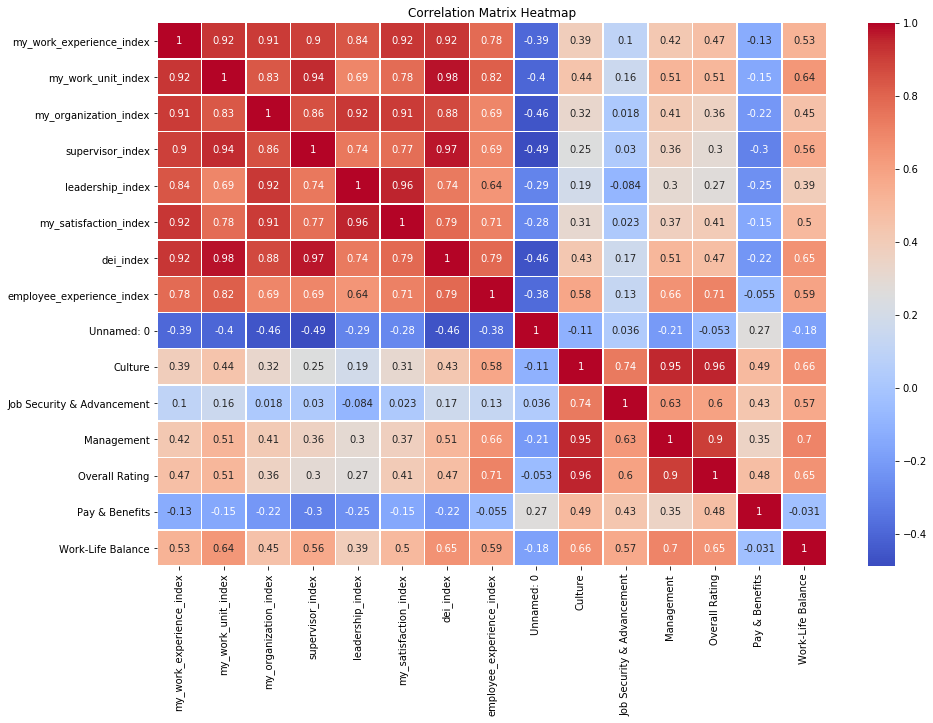

In [113]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()